<a href="https://colab.research.google.com/github/Vanchnav/Anime_dataset_analysis-ensemble_of_models-RSME/blob/main/Anime_dataset_analysis_ensemble_of_models_with_RSME.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Импортирование библиотек и данных**

In [ ]:
# библиотека линейной алгебры
import numpy as np

# библиотека обработки данных
import pandas as pd
from google.colab import files
import io

# библиотеки для визуализации
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import jinja2

# библиотека обработки фич
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# библиотека для разделения данных на тренировочные и тестовые
from sklearn.model_selection import train_test_split

# библиотеки для регрессии в моделях
from sklearn.linear_model import LinearRegression 
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier

# библиотеки оценивания\метрики
from sklearn import metrics 
from sklearn.metrics import mean_squared_error

In [ ]:
uploaded = files.upload()

Saving Anime.csv to Anime.csv


In [ ]:
#Для просмотра всех столбцов, применять по желанию
pd.set_option('display.max_columns', None)

In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['Anime.csv']))
print(df)

          ID                                       Title  \
0      16498                          Shingeki no Kyojin   
1       1535                                  Death Note   
2       5114            Fullmetal Alchemist: Brotherhood   
3      30276                               One Punch Man   
4      11757                            Sword Art Online   
...      ...                                         ...   
21455  45064    Xiao Gongzhu Ai Wei La Yu Shenmi Wangguo   
21456  45065  Xiao Gongzhu Ai Wei La Yu Shenmi Wangguo 2   
21457  45059                     Yongzhe Chuang Mo Cheng   
21458  45063             Yu Shen Chuan: Wangzhe Shaonian   
21459  45061                               Konglong Wang   

                                                Synonyms  \
0                                               AoT, SnK   
1                                                     DN   
2      Hagane no Renkinjutsushi Fullmetal Alchemist, ...   
3                      One Punch-Man, O

**2. Предварительный анализ данных**

In [ ]:
df

ID                                       Title  \
0      16498                          Shingeki no Kyojin   
1       1535                                  Death Note   
2       5114            Fullmetal Alchemist: Brotherhood   
3      30276                               One Punch Man   
4      11757                            Sword Art Online   
...      ...                                         ...   
21455  45064    Xiao Gongzhu Ai Wei La Yu Shenmi Wangguo   
21456  45065  Xiao Gongzhu Ai Wei La Yu Shenmi Wangguo 2   
21457  45059                     Yongzhe Chuang Mo Cheng   
21458  45063             Yu Shen Chuan: Wangzhe Shaonian   
21459  45061                               Konglong Wang   

                                                Synonyms  \
0                                               AoT, SnK   
1                                                     DN   
2      Hagane no Renkinjutsushi Fullmetal Alchemist, ...   
3                      One Punch-Man, One-Punch Man, OPM   
4                                             S.A.O, SAO   
...                                                  ...   
21455                                            Unknown   
21456                                            Unknown   
21457                                            Unknown   
21458                                            Unknown   
21459                                            Unknown   

                         Japanese                           English  \
0                           進撃の巨人                   Attack on Titan   
1                           デスノート                        Death Note   
2      鋼の錬金術師 FULLMETAL ALCHEMIST   Fullmetal Alchemist Brotherhood   
3                          ワンパンマン                     One Punch Man   
4                    ソードアート・オンライン                  Sword Art Online   
...                           ...                               ...   
21455                 小公主艾薇拉与神秘王国          Princess and the Kingdom   
21456                小公主艾薇拉与神秘王国2  Avera and the Mystical Kingdom 2   
21457                       勇者闯魔城                        Brave City   
21458                    禹神传之王者少年           The Juvenile of King Yu   
21459                         恐龙王                         Dino King   

                                                Synopsis   Type  Episodes  \
0      Centuries ago, mankind was slaughtered to near...     TV      25.0   
1      Brutal murders, petty thefts, and senseless vi...     TV      37.0   
2      After a horrific alchemy experiment goes wrong...     TV      64.0   
3      The seemingly unimpressive Saitama has a rathe...     TV      12.0   
4      Ever since the release of the innovative Nerve...     TV      25.0   
...                                                  ...    ...       ...   
21455                                            Unknown  Movie       1.0   
21456                                            Unknown  Movie       1.0   
21457                                            Unknown  Movie       1.0   
21458                                            Unknown  Movie       1.0   
21459                                            Unknown  Movie       1.0   

                Status   Start_Aired  ...                    Themes  \
0      Finished Airing   Apr 7, 2013  ...  Gore, Military, Survival   
1      Finished Airing   Oct 4, 2006  ...             Psychological   
2      Finished Airing   Apr 5, 2009  ...                  Military   
3      Finished Airing   Oct 5, 2015  ...       Parody, Super Power   
4      Finished Airing   Jul 8, 2012  ...  Love Polygon, Video Game   
...                ...           ...  ...                       ...   
21455  Finished Airing  May 12, 2018  ...                   Unknown   
21456  Finished Airing  Aug 22, 2020  ...                   Unknown   
21457  Finished Airing  Mar 16, 2018  ...                   Unknown   
21458  Finished Airing  Aug 15, 2018  ...                   Unknown   
21459  Fi

Посмотрим размер таблицы:

In [ ]:
print("Количество строк = ", df.shape[0], " \nКоличество столбцов = " , df.shape[1]) 

Количество строк =  21460  
Количество столбцов =  28


Список столбцов:

In [ ]:
df.columns

Index(['ID', 'Title', 'Synonyms', 'Japanese', 'English', 'Synopsis', 'Type',
       'Episodes', 'Status', 'Start_Aired', 'End_Aired', 'Premiered',
       'Broadcast', 'Producers', 'Licensors', 'Studios', 'Source', 'Genres',
       'Themes', 'Demographics', 'Duration_Minutes', 'Rating', 'Score',
       'Scored_Users', 'Ranked', 'Popularity', 'Members', 'Favorites'],
      dtype='object')

Смотрим информацию о столбцах и выводим несколько случайных строк с данными:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21460 entries, 0 to 21459
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                21460 non-null  int64  
 1   Title             21460 non-null  object 
 2   Synonyms          21460 non-null  object 
 3   Japanese          21460 non-null  object 
 4   English           21460 non-null  object 
 5   Synopsis          21460 non-null  object 
 6   Type              21460 non-null  object 
 7   Episodes          20913 non-null  float64
 8   Status            21460 non-null  object 
 9   Start_Aired       21460 non-null  object 
 10  End_Aired         21460 non-null  object 
 11  Premiered         21460 non-null  object 
 12  Broadcast         21460 non-null  object 
 13  Producers         21460 non-null  object 
 14  Licensors         21460 non-null  object 
 15  Studios           21460 non-null  object 
 16  Source            21460 non-null  object

Анализируем основные показатели по числовым столбцам, "расскраска" по строкам

In [ ]:
df.describe().T.style.background_gradient(axis=1, cmap='Spectral')

Проверяем на наличие дубликатов

In [ ]:
df.duplicated().sum()

0

Анализ на пропущенные значения

In [ ]:
df.isnull().sum()

ID                     0
Title                  0
Synonyms               0
Japanese               0
English                0
Synopsis               0
Type                   0
Episodes             547
Status                 0
Start_Aired            0
End_Aired              0
Premiered              0
Broadcast              0
Producers              0
Licensors              0
Studios                0
Source                 0
Genres                 0
Themes                 0
Demographics           0
Duration_Minutes     599
Rating                 0
Score               6898
Scored_Users        6898
Ranked              1924
Popularity             0
Members                0
Favorites              0
dtype: int64

Определяем цвета: желтый - пропущенные данные, синий - не пропущенные

<Axes: >

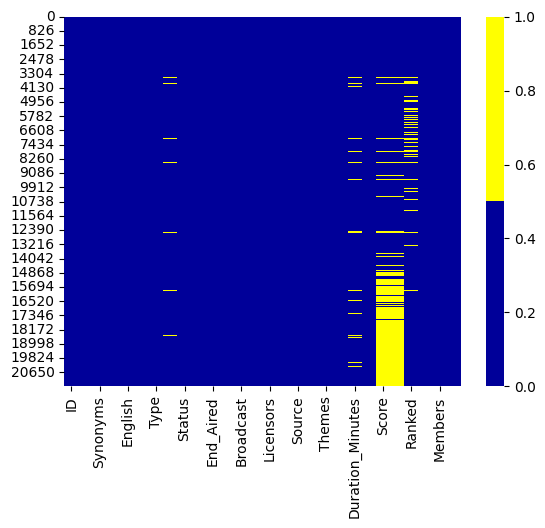

In [ ]:
cols = df.columns
colours = ['#000099', '#ffff00'] 
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

In [ ]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

ID - 0%
Title - 0%
Synonyms - 0%
Japanese - 0%
English - 0%
Synopsis - 0%
Type - 0%
Episodes - 3%
Status - 0%
Start_Aired - 0%
End_Aired - 0%
Premiered - 0%
Broadcast - 0%
Producers - 0%
Licensors - 0%
Studios - 0%
Source - 0%
Genres - 0%
Themes - 0%
Demographics - 0%
Duration_Minutes - 3%
Rating - 0%
Score - 32%
Scored_Users - 32%
Ranked - 9%
Popularity - 0%
Members - 0%
Favorites - 0%


Как видно из данных, больше всего пропусков в столбце "Score". Посмотрим на данные, чтобы узнать, чем могли быть вызваны пропуски

created missing indicator for: Episodes
created missing indicator for: Duration_Minutes
created missing indicator for: Score
created missing indicator for: Scored_Users
created missing indicator for: Ranked


<Axes: xlabel='index'>

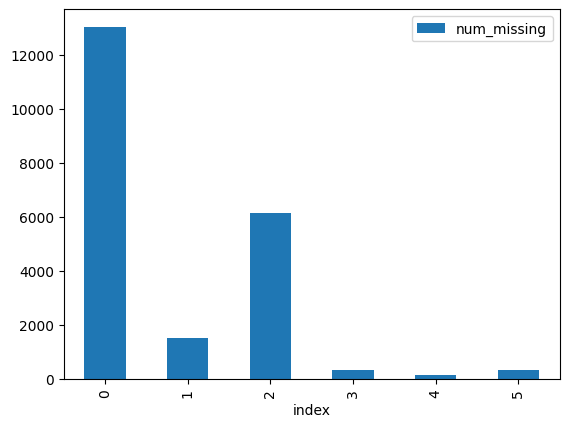

In [ ]:
# Сначала создаем индикатор для признаков с пропущенными данными
for col in df.columns:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
        print('created missing indicator for: {}'.format(col))
        df['{}_ismissing'.format(col)] = missing


# Затем на основе индикатора строим гистограмму
ismissing_cols = [col for col in df.columns if 'ismissing' in col]
df['num_missing'] = df[ismissing_cols].sum(axis=1)

df['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing')

Датафрейм без пропусков в столбце "Score"

In [ ]:
df_new = df[df['Score'].notnull()]
df_new

ID                             Title  \
0      16498                Shingeki no Kyojin   
1       1535                        Death Note   
2       5114  Fullmetal Alchemist: Brotherhood   
3      30276                     One Punch Man   
4      11757                  Sword Art Online   
...      ...                               ...   
17720  41763                         Hikari yo   
17737  51893                               Mr.   
17820  41308              Greenlights Serenade   
17857  51573                 Heart Beat (2019)   
17988  52454                           UnAlive   

                                                Synonyms  \
0                                               AoT, SnK   
1                                                     DN   
2      Hagane no Renkinjutsushi Fullmetal Alchemist, ...   
3                      One Punch-Man, One-Punch Man, OPM   
4                                             S.A.O, SAO   
...                                                  ...   
17720                                            Unknown   
17737                                             Mister   
17820                                            Unknown   
17857                                          Heartbeat   
17988                                            Unknown   

                         Japanese                          English  \
0                           進撃の巨人                  Attack on Titan   
1                           デスノート                       Death Note   
2      鋼の錬金術師 FULLMETAL ALCHEMIST  Fullmetal Alchemist Brotherhood   
3                          ワンパンマン                    One Punch Man   
4                    ソードアート・オンライン                 Sword Art Online   
...                           ...                              ...   
17720                          光よ                          O Light   
17737                        ミスター                          Unknown   
17820               グリーンライツ・セレナーデ                          Unknown   
17857                      ハートビート                          Unknown   
17988                     UnAlive                          Unknown   

                                                Synopsis   Type  Episodes  \
0      Centuries ago, mankind was slaughtered to near...     TV      25.0   
1      Brutal murders, petty thefts, and senseless vi...     TV      37.0   
2      After a horrific alchemy experiment goes wrong...     TV      64.0   
3      The seemingly unimpressive Saitama has a rathe...     TV      12.0   
4      Ever since the release of the innovative Nerve...     TV      25.0   
...                                                  ...    ...       ...   
17720                                            Unknown  Music       1.0   
17737  Animated music video for the song Mr. by YOASOBI.  Music       1.0   
17820  Greenlights Serenade is an original song by Om...  Music       1.0   
17857       Music video for the song Heart Beat by AZKi.  Music       1.0   
17988                                            Unknown  Music       1.0   

                Status   Start_Aired  ...   Ranked Popularity  Members  \
0      Finished Airing   Apr 7, 2013  ...   1002.0          1  3524109   
1      Finished Airing   Oct 4, 2006  ...    732.0          2  3504535   
2      Finished Airing   Apr 5, 2009  ...     12.0          3  2978455   
3      Finished Airing   Oct 5, 2015  ...   1112.0          4  2879907   
4      Finished Airing   Jul 8, 2012  ...  29562.0          5  2813565   
...                ...           ...  ...      ...        ...      ...   
17720  Finished Airing  May 13, 2016  ...  78922.0      17746      187   
17737  Finished Airing  May 22, 2022  ...  61512.0      17763      186   
17820  Finished Airing   Jul 6, 2018  ...  93762.0      17845      181   
17857  Finished Airing  Jul 19, 2019  ...  94362.0      17883      179   
17988  Finished Airing  Mar 21, 2022  ...  77042.0      18014      172   

      Favorites Episodes_ismissin

In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14562 entries, 0 to 17988
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          14562 non-null  int64  
 1   Title                       14562 non-null  object 
 2   Synonyms                    14562 non-null  object 
 3   Japanese                    14562 non-null  object 
 4   English                     14562 non-null  object 
 5   Synopsis                    14562 non-null  object 
 6   Type                        14562 non-null  object 
 7   Episodes                    14484 non-null  float64
 8   Status                      14562 non-null  object 
 9   Start_Aired                 14562 non-null  object 
 10  End_Aired                   14562 non-null  object 
 11  Premiered                   14562 non-null  object 
 12  Broadcast                   14562 non-null  object 
 13  Producers                   145

Датафрем их строк с пропусками в столбце "Score"

In [ ]:
df_new2 = df[df['Score'].isnull()]
df_new2

ID                                       Title  \
362    44511                                Chainsaw Man   
813    50172                          Mob Psycho 100 III   
833    40357        Tate no Yuusha no Nariagari Season 3   
890    50602                         Spy x Family Part 2   
915    49918            Boku no Hero Academia 6th Season   
...      ...                                         ...   
21455  45064    Xiao Gongzhu Ai Wei La Yu Shenmi Wangguo   
21456  45065  Xiao Gongzhu Ai Wei La Yu Shenmi Wangguo 2   
21457  45059                     Yongzhe Chuang Mo Cheng   
21458  45063             Yu Shen Chuan: Wangzhe Shaonian   
21459  45061                               Konglong Wang   

                                                Synonyms  \
362                                              Unknown   
813    Mob Psycho 100 3rd Season, Mob Psycho Hyaku, M...   
833    Tate no Yuusha no Nariagari 3rd Season, The Ri...   
890                                              Unknown   
915                                   My Hero Academia 6   
...                                                  ...   
21455                                            Unknown   
21456                                            Unknown   
21457                                            Unknown   
21458                                            Unknown   
21459                                            Unknown   

                     Japanese                                 English  \
362                   チェンソーマン                            Chainsaw Man   
813              モブサイコ100 III                      Mob Psycho 100 III   
833                盾の勇者の成り上がり  The Rising of the Shield Hero Season 3   
890                SPY×FAMILY                                 Unknown   
915    僕のヒーローアカデミア 6th Season               My Hero Academia Season 6   
...                       ...                                     ...   
21455             小公主艾薇拉与神秘王国                Princess and the Kingdom   
21456            小公主艾薇拉与神秘王国2        Avera and the Mystical Kingdom 2   
21457                   勇者闯魔城                              Brave City   
21458                禹神传之王者少年                 The Juvenile of King Yu   
21459                     恐龙王                               Dino King   

                                                Synopsis   Type  Episodes  \
362    Denji has a simple dream—to live a happy and p...     TV       NaN   
813                      Third season of Mob Psycho 100.     TV       NaN   
833         Third season of Tate no Yuusha no Nariagari.     TV       NaN   
890                     The second part of Spy x Family.     TV      13.0   
915               Sixth season of Boku no Hero Academia.     TV       NaN   
...                                                  ...    ...       ...   
21455                                            Unknown  Movie       1.0   
21456                                            Unknown  Movie       1.0   
21457                                            Unknown  Movie       1.0   
21458                                            Unknown  Movie       1.0   
21459                                            Unknown  Movie       1.0   

                Status   Start_Aired      End_Aired  Premiered  \
362      Not yet aired  Oct 12, 2022        Unknown  Fall 2022   
813      Not yet aired   Oct 6, 2022        Unknown  Fall 2022   
833      Not yet aired       Unknown  Not Available    Unknown   
890      Not yet aired   Oct 1, 2022        Unknown  Fall 2022   
915      Not yet aired   Oct 1, 2022        Unknown  Fall 2022   
...                ...           ...            ...        ...   
21455  Finished Airing  May 12, 2018  Not Available    Unknown   
21456  Finished Airing  Aug 22, 2020  Not Available    Unknown   
21457  Finished Airing  Mar 16, 2018  Not Available    Unknown   
21458  Finished Airing  Aug 15, 2018  Not Available    Unknown   
21459  Finished Airing  Nov 10, 2018  No

In [ ]:
df_new2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6898 entries, 362 to 21459
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          6898 non-null   int64  
 1   Title                       6898 non-null   object 
 2   Synonyms                    6898 non-null   object 
 3   Japanese                    6898 non-null   object 
 4   English                     6898 non-null   object 
 5   Synopsis                    6898 non-null   object 
 6   Type                        6898 non-null   object 
 7   Episodes                    6429 non-null   float64
 8   Status                      6898 non-null   object 
 9   Start_Aired                 6898 non-null   object 
 10  End_Aired                   6898 non-null   object 
 11  Premiered                   6898 non-null   object 
 12  Broadcast                   6898 non-null   object 
 13  Producers                   68

In [ ]:
df_new.describe().T.style.background_gradient(axis=1, cmap='Spectral')

In [ ]:
df_new2.describe().T.style.background_gradient(axis=1, cmap='Spectral')

<Axes: title={'center': 'df_new Popularity'}>

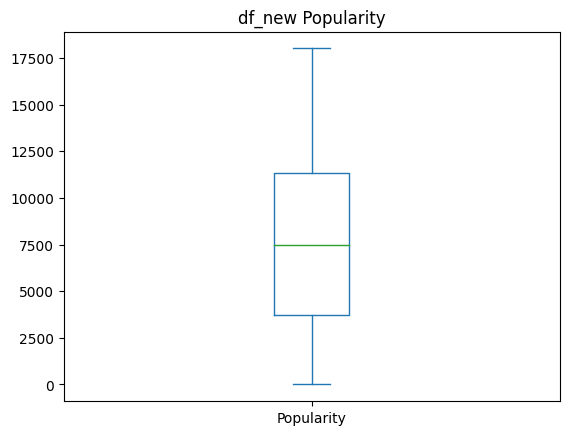

In [ ]:
df_new['Popularity'].plot(kind='box', title='df_new Popularity')

<Axes: title={'center': 'df_new2 Popularity'}>

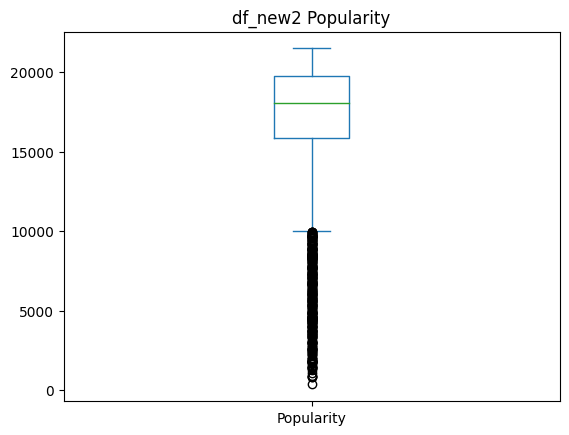

In [ ]:
df_new2['Popularity'].plot(kind='box', title='df_new2 Popularity')

Судя по графикам и данным из таблиц выше, значение популярности (ранг в зависимости от того, сколько пользователей добавило аниме в свой лист) имеет выбросы, причем в большом количестве в датафрейме df_new2, но не может вывести зависимость того, будет обладать тайтл оценкой пользователя или нет (как минимум самолично)

<Axes: title={'center': 'df_new Members'}>

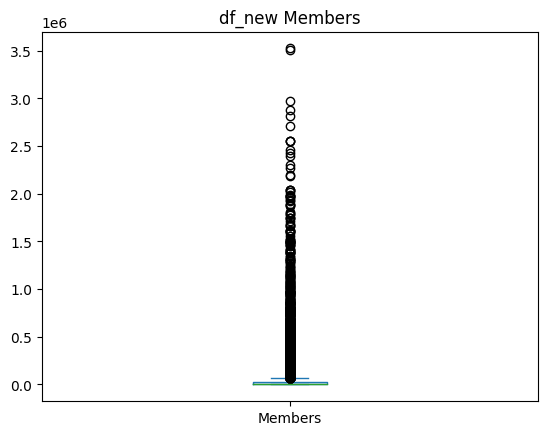

In [ ]:
df_new['Members'].plot(kind='box', title='df_new Members')

<Axes: title={'center': 'df_new2 Members'}>

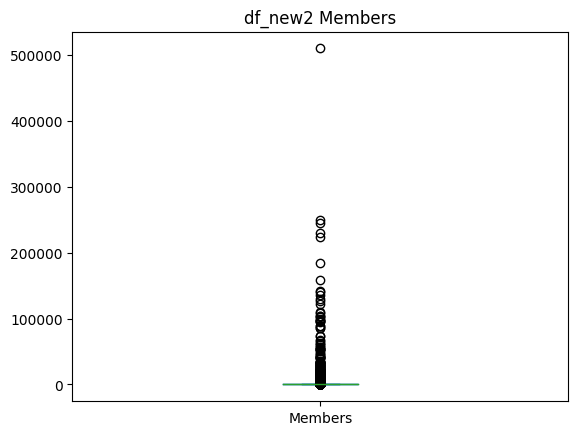

In [ ]:
df_new2['Members'].plot(kind='box', title='df_new2 Members')

Значения столбца 'Members' имеет большую разницу в цифрах (достаточно посмотреть на квантили значений, а также на количество выбросов на графиках). Соответственно, можно предположить, что будет оценка от пользователя или нет зависит от количества пользователей, которые добавили тайтл к себе в листы. В дальнейшем, при построении модели, будет сделано две модели, одна - содержащая пропуски в анализируемом столбце, а другая - нет. Гипотеза, которая будет проверна: насколько пропуски в 'Score' влияют на прогноз

**3. Очистка и подготовка данных к обучению**

Избавимся от столбцов, которые однозначно не имеют отношения к дальнейшему обучению

In [ ]:
df = df.drop('ID', axis=1)

Уберем все варианты названия на различных языках, кроме самого названия тайтла, так как они не имеют какого-либо отношения к прогнозу.

In [ ]:
df = df.drop('Synonyms', axis=1)
df = df.drop('Japanese', axis=1)
df = df.drop('English', axis=1)

К каким столбцам есть вопросы:

1.   Title - преобразовать в числовой (?)
2.   Synopsis - преобразовать в числовой или убрать (?)
3. Start_Aired - преобразовать дату в числовой
4. End_Aired - скорее убрать, нет смысла оставлять конец эфира. Единственное - можно расчитать разницу с первого и последнего выхода в эфир, но это под вопросом валидности
5. Premiered - убрать
6. Broadcast - можно преобразовать, но заполнен значениями Unknown на 11762, что чуть менее половины. Можно убрать
7. Producers - убрать
8. Licensors - убрать
9. Studios - убрать
10. Source - преобразовать
11. Genres & Themes - преобразовать с помощью get_dummies
12. Demographics - преобразовать
13. Rating - преобразовать
14. Episodes_ismissing-Ranked_ismissing - преобразовать тип bool
15. Episodes, Duration_minutes, Ranked - избавиться от пропусков заменой


In [ ]:
df.replace('Unknown', np.nan, inplace=True)

In [ ]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Title - 0%
Synopsis - 13%
Type - 0%
Episodes - 3%
Status - 0%
Start_Aired - 2%
End_Aired - 5%
Premiered - 76%
Broadcast - 85%
Producers - 49%
Licensors - 79%
Studios - 38%
Source - 17%
Genres - 17%
Themes - 45%
Demographics - 63%
Duration_Minutes - 3%
Rating - 0%
Score - 32%
Scored_Users - 32%
Ranked - 9%
Popularity - 0%
Members - 0%
Favorites - 0%


In [ ]:
df.isnull().sum()

Title                   0
Synopsis             2718
Type                   45
Episodes              547
Status                  0
Start_Aired           374
End_Aired            1073
Premiered           16236
Broadcast           18316
Producers           10588
Licensors           16884
Studios              8090
Source               3602
Genres               3699
Themes               9648
Demographics        13426
Duration_Minutes      599
Rating                  0
Score                6898
Scored_Users         6898
Ranked               1924
Popularity              0
Members                 0
Favorites               0
dtype: int64

Стоит отметить, что столбцы "Premiered", "Broadcast" и "Licensors" имеют более 70% отсутствующих значений. Избавимся от этих столбцов

In [ ]:
df = df.drop('Premiered', axis=1)
df = df.drop('Broadcast', axis=1)
df = df.drop('Licensors', axis=1)

В столбце "Demographics" отсутствует 63% данных. В данном случае заполнение пробелов самым распространенным классом может повлиять на качество данных. Для начала нужно выяснить, являются пропуски систематической ошибкой или случайностью, а затем решим, каким образом поступить со столбцом.

In [ ]:
df.groupby(df['Demographics'].isnull()).mean()

<ipython-input-11-8683d161d911>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(df['Demographics'].isnull()).mean()


Episodes  Duration_Minutes     Score  Scored_Users  \
Demographics                                                        
False         19.741960         26.054678  6.744721  39415.876969   
True           9.371915         22.655782  6.282736  20952.412140   

                     Ranked    Popularity       Members   Favorites  
Demographics                                                         
False         102862.997601  11842.715459  48279.602315  644.567712  
True           94340.637342  10085.105690  33872.274914  353.096529

Различий не так много. Среднее количество эпизодов, у которых отсутствует значение 'Demographics' примерно в два раза меньше, чем у тех, у которых оно присутствует. Такая же разница прогядывается в количестве пользователей, оценивших тайтл, а также в количестве пользователей, добавивших тайтл в 'Favorites'. Разница же между показателями 'Members' меньше, в примерно полтора раза.

Для более детального анализа, создадим новую колонку 'Demographics_NaN' (бинарный классификатор). Используем метод where(), где прописываем условие: - если значение в колонке 'Demographics' отсутствует, то присваиваем в колонке 'Demographics_NaN' - значение 0, если присутствует, то 1.

In [ ]:
df['Demographics_NaN'] = np.where(df['Demographics'].isnull(), 0,1)
df.head(6)

Title  \
0                Shingeki no Kyojin   
1                        Death Note   
2  Fullmetal Alchemist: Brotherhood   
3                     One Punch Man   
4                  Sword Art Online   
5             Boku no Hero Academia   

                                            Synopsis Type  Episodes  \
0  Centuries ago, mankind was slaughtered to near...   TV      25.0   
1  Brutal murders, petty thefts, and senseless vi...   TV      37.0   
2  After a horrific alchemy experiment goes wrong...   TV      64.0   
3  The seemingly unimpressive Saitama has a rathe...   TV      12.0   
4  Ever since the release of the innovative Nerve...   TV      25.0   
5  The appearance of "quirks," newly discovered s...   TV      13.0   

            Status  Start_Aired     End_Aired  \
0  Finished Airing  Apr 7, 2013  Sep 29, 2013   
1  Finished Airing  Oct 4, 2006  Jun 27, 2007   
2  Finished Airing  Apr 5, 2009   Jul 4, 2010   
3  Finished Airing  Oct 5, 2015  Dec 21, 2015   
4  Finished Airing  Jul 8, 2012  Dec 23, 2012   
5  Finished Airing  Apr 3, 2016  Jun 26, 2016   

                                           Producers       Studios  \
0  Production I.G, Dentsu, Mainichi Broadcasting ...    Wit Studio   
1  VAP, Konami, Ashi Productions, Nippon Televisi...      Madhouse   
2  Aniplex, Square Enix, Mainichi Broadcasting Sy...         Bones   
3  TV Tokyo, Bandai Visual, Lantis, Asatsu DK, Ba...      Madhouse   
4  Aniplex, Genco, DAX Production, ASCII Media Wo...  A-1 Pictures   
5  Dentsu, Mainichi Broadcasting System, Movic, T...         Bones   

        Source  ... Demographics Duration_Minutes  \
0        Manga  ...      Shounen             24.0   
1        Manga  ...      Shounen             23.0   
2        Manga  ...      Shounen             24.0   
3    Web manga  ...       Seinen             24.0   
4  Light novel  ...          NaN             23.0   
5        Manga  ...      Shounen             24.0   

                           Rating  Score Scored_Users   Ranked  Popularity  \
0  R - 17+ (violence & profanity)  8.531     519803.0   1002.0           1   
1  R - 17+ (violence & profanity)  8.621     485487.0    732.0           2   
2  R - 17+ (violence & profanity)  9.131     900398.0     12.0           3   
3  R - 17+ (violence & profanity)  8.511      19066.0   1112.0           4   
4       PG-13 - Teens 13 or older  7.201     990254.0  29562.0           5   
5       PG-13 - Teens 13 or older  7.921     871325.0   6722.0           6   

   Members  Favorites  Demographics_NaN  
0  3524109     155695                 1  
1  3504535     159701                 1  
2  2978455     207772                 1  
3  2879907      59651                 1  
4  2813565      64997                 0  
5  2708684      52169                 1  

[6 rows x 22 columns]

In [ ]:
df['Demographics_NaN'].value_counts()

0    13426
1     8034
Name: Demographics_NaN, dtype: int64

Сгруппируем значения по количеству эпизодов, количества оценок от пользователей и добавленных в избранное.

In [ ]:
df.groupby(['Demographics_NaN','Episodes']) ['Score'].value_counts(normalize=True)

Demographics_NaN  Episodes  Score
0                 1.0       6.051    0.006876
                            5.971    0.006460
                            5.521    0.006251
                            6.261    0.006043
                            5.551    0.005835
                                       ...   
1                 694.0     6.861    1.000000
                  726.0     5.981    1.000000
                  1306.0    5.771    1.000000
                  1565.0    5.551    1.000000
                  1787.0    7.771    1.000000
Name: Score, Length: 5719, dtype: float64

In [ ]:
df.groupby(['Demographics_NaN','Scored_Users']) ['Score'].value_counts(normalize=True)

Demographics_NaN  Scored_Users  Score
0                 101.0         5.961    1.00
                  102.0         5.091    0.25
                                5.301    0.25
                                5.701    0.25
                                5.781    0.25
                                         ... 
1                 943149.0      7.931    1.00
                  945254.0      7.911    1.00
                  949588.0      7.581    1.00
                  950704.0      8.411    1.00
                  997243.0      7.881    1.00
Name: Score, Length: 14449, dtype: float64

In [ ]:
df.groupby(['Demographics_NaN','Favorites']) ['Score'].value_counts(normalize=True)

Demographics_NaN  Favorites  Score
0                 0          5.501    0.010676
                             5.611    0.010676
                             5.691    0.010676
                             5.401    0.009659
                             6.051    0.009659
                                        ...   
1                 155695     8.531    1.000000
                  159701     8.621    1.000000
                  177620     8.671    1.000000
                  188649     9.041    1.000000
                  207772     9.131    1.000000
Name: Score, Length: 9424, dtype: float64

Единственная связь, которая прослеживается - столбцы, которые имеют более низкие показатели (меньше оценок от пользователей, меньше эпизодов (что может говорить о наличие непопулярных полнометражных фильмов), меньше добавлений в избранное (от чего и идут другие показатели)) с меньшей вероятностью получат показатель в столбце 'Demographics'. Так как сам исследуемый столбец может представлять важность (влиять на выбор пользователя), то избавляться от него нецелесобразно, соответственно - вынесем пропущенные значения в отдельный класс и закодируем значения.

In [ ]:
df = df.drop('Demographics_NaN', axis=1)

In [ ]:
df['Demographics'].fillna('Unknown', inplace=True)
df_extra = df['Demographics'].str.get_dummies(', ').add_prefix('Demographics_')
df = (df.drop(['Demographics'],axis=1)).join(df_extra)

Разберемся с оставшимися пропущенными значениями. Начнем со столбца "Episodes". Заменим пропуски на среднее значение

In [ ]:
df.groupby(df['Episodes'].isnull()).mean()

<ipython-input-19-fcd148c489a0>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(df['Episodes'].isnull()).mean()


Episodes  Duration_Minutes     Score  Scored_Users         Ranked  \
Episodes                                                                       
False     13.272892         24.061773  6.420829  26589.980599   97435.457103   
True            NaN         12.013575  6.587923  11130.589744  132752.904523   

            Popularity      Members   Favorites  Demographics_Josei  \
Episodes                                                              
False     10743.650265  39813.51456  462.035480            0.004782   
True      10722.206581  18331.73309  469.073126            0.001828   

          Demographics_Kids  Demographics_Seinen  Demographics_Shoujo  \
Episodes                                                                
False              0.203414             0.041888             0.033233   
True               0.127971             0.060329             0.020110   

          Demographics_Shounen  Demographics_Unknown  
Episodes                                              
False                 0.097595              0.623823  
True                  0.096892              0.694698

In [ ]:
df['Episodes_NaN'] = np.where(df['Episodes'].isnull(), 0,1)
df.head(6)

Title  \
0                Shingeki no Kyojin   
1                        Death Note   
2  Fullmetal Alchemist: Brotherhood   
3                     One Punch Man   
4                  Sword Art Online   
5             Boku no Hero Academia   

                                            Synopsis Type  Episodes  \
0  Centuries ago, mankind was slaughtered to near...   TV      25.0   
1  Brutal murders, petty thefts, and senseless vi...   TV      37.0   
2  After a horrific alchemy experiment goes wrong...   TV      64.0   
3  The seemingly unimpressive Saitama has a rathe...   TV      12.0   
4  Ever since the release of the innovative Nerve...   TV      25.0   
5  The appearance of "quirks," newly discovered s...   TV      13.0   

            Status  Start_Aired     End_Aired  \
0  Finished Airing  Apr 7, 2013  Sep 29, 2013   
1  Finished Airing  Oct 4, 2006  Jun 27, 2007   
2  Finished Airing  Apr 5, 2009   Jul 4, 2010   
3  Finished Airing  Oct 5, 2015  Dec 21, 2015   
4  Finished Airing  Jul 8, 2012  Dec 23, 2012   
5  Finished Airing  Apr 3, 2016  Jun 26, 2016   

                                           Producers       Studios  \
0  Production I.G, Dentsu, Mainichi Broadcasting ...    Wit Studio   
1  VAP, Konami, Ashi Productions, Nippon Televisi...      Madhouse   
2  Aniplex, Square Enix, Mainichi Broadcasting Sy...         Bones   
3  TV Tokyo, Bandai Visual, Lantis, Asatsu DK, Ba...      Madhouse   
4  Aniplex, Genco, DAX Production, ASCII Media Wo...  A-1 Pictures   
5  Dentsu, Mainichi Broadcasting System, Movic, T...         Bones   

        Source  ... Popularity  Members  Favorites Demographics_Josei  \
0        Manga  ...          1  3524109     155695                  0   
1        Manga  ...          2  3504535     159701                  0   
2        Manga  ...          3  2978455     207772                  0   
3    Web manga  ...          4  2879907      59651                  0   
4  Light novel  ...          5  2813565      64997                  0   
5        Manga  ...          6  2708684      52169                  0   

   Demographics_Kids  Demographics_Seinen  Demographics_Shoujo  \
0                  0                    0                    0   
1                  0                    0                    0   
2                  0                    0                    0   
3                  0                    1                    0   
4                  0                    0                    0   
5                  0                    0                    0   

   Demographics_Shounen  Demographics_Unknown  Episodes_NaN  
0                     1                     0             1  
1                     1                     0             1  
2                     1                     0             1  
3                     0                     0             1  
4                     0                     1             1  
5                     1                     0             1  

[6 rows x 27 columns]

In [ ]:
df.groupby(['Episodes_NaN']) ['Score'].value_counts(normalize=True)

Episodes_NaN  Score
0             6.541    0.051282
              5.781    0.038462
              7.201    0.038462
              5.891    0.025641
              6.091    0.025641
                         ...   
1             8.941    0.000069
              8.991    0.000069
              9.071    0.000069
              9.121    0.000069
              9.131    0.000069
Name: Score, Length: 621, dtype: float64

In [ ]:
df.groupby(['Episodes_NaN', 'Scored_Users']) ['Score'].value_counts(normalize=True)

Episodes_NaN  Scored_Users  Score
0             103.0         6.981    1.0
              110.0         6.591    1.0
              120.0         5.691    1.0
              124.0         5.041    1.0
              133.0         5.951    1.0
                                    ... 
1             950704.0      8.411    1.0
              959062.0      8.341    1.0
              970920.0      8.261    1.0
              990254.0      7.201    1.0
              997243.0      7.881    1.0
Name: Score, Length: 14388, dtype: float64

In [ ]:
df.groupby(['Episodes_NaN', 'Duration_Minutes']) ['Score'].value_counts(normalize=True)

Episodes_NaN  Duration_Minutes  Score
0             1.0               5.571    0.1
                                5.781    0.1
                                5.831    0.1
                                6.141    0.1
                                6.381    0.1
                                        ... 
1             160.0             8.071    1.0
              161.0             8.001    0.5
                                8.611    0.5
              163.0             6.871    1.0
              168.0             8.221    1.0
Name: Score, Length: 7729, dtype: float64

Пропущенные значения также относятся к менее популярным тайтлам, но в данном случае присутствуют тайтлы, которые по хронометражу крайне малы (например длятся всего одну минуту, какие-нибудь веб-выпуски). Количество эпизодов в них можно заменить средним значением.

In [ ]:
df = df.drop('Episodes_NaN', axis=1)

In [ ]:
df['Episodes'].fillna(df['Episodes'].mean(), inplace=True)

Тоже самое сделаем со столбцом "Duration_minutes"

In [ ]:
df.groupby(df['Duration_Minutes'].isnull()).mean()

<ipython-input-26-597619ed73a4>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(df['Duration_Minutes'].isnull()).mean()


Episodes  Duration_Minutes     Score  Scored_Users  \
Duration_Minutes                                                        
False             13.349423         23.934135  6.422011  26532.147993   
True              10.607618               NaN  6.123857    555.428571   

                         Ranked    Popularity       Members   Favorites  \
Duration_Minutes                                                          
False              97230.208269  10736.192656  40028.824936  472.607497   
True              156573.827957  10983.789649  12698.115192  100.277129   

                  Demographics_Josei  Demographics_Kids  Demographics_Seinen  \
Duration_Minutes                                                               
False                       0.004698           0.203634             0.041944   
True                        0.005008           0.126878             0.056761   

                  Demographics_Shoujo  Demographics_Shounen  \
Duration_Minutes                                              
False                        0.033124              0.097503   
True                         0.025042              0.100167   

                  Demographics_Unknown  
Duration_Minutes                        
False                         0.623891  
True                          0.686144

In [ ]:
df['Duration_Minutes_NaN'] = np.where(df['Duration_Minutes'].isnull(), 0,1)

In [ ]:
df.groupby(['Duration_Minutes_NaN', 'Scored_Users']) ['Score'].value_counts(normalize=True)

Duration_Minutes_NaN  Scored_Users  Score
0                     119.0         5.521    1.0
                      130.0         5.711    1.0
                      138.0         5.601    1.0
                      160.0         6.341    1.0
                      193.0         7.151    1.0
                                            ... 
1                     950704.0      8.411    1.0
                      959062.0      8.341    1.0
                      970920.0      8.261    1.0
                      990254.0      7.201    1.0
                      997243.0      7.881    1.0
Name: Score, Length: 14389, dtype: float64

In [ ]:
df.groupby(['Duration_Minutes_NaN', 'Members']) ['Score'].value_counts(normalize=True)

Duration_Minutes_NaN  Members  Score
0                     532      5.711    1.0
                      595      5.601    1.0
                      720      5.521    1.0
                      1028     6.341    1.0
                      1043     6.511    1.0
                                       ... 
1                     2813565  7.201    1.0
                      2879907  8.511    1.0
                      2978455  9.131    1.0
                      3504535  8.621    1.0
                      3524109  8.531    1.0
Name: Score, Length: 14516, dtype: float64

In [ ]:
df.groupby(['Duration_Minutes_NaN', 'Favorites']) ['Score'].value_counts(normalize=True)

Duration_Minutes_NaN  Favorites  Score
0                     0          5.601    0.333333
                                 5.711    0.333333
                                 6.511    0.333333
                      1          5.521    0.333333
                                 6.301    0.333333
                                            ...   
1                     159701     8.621    1.000000
                      175248     9.081    1.000000
                      177620     8.671    1.000000
                      188649     9.041    1.000000
                      207772     9.131    1.000000
Name: Score, Length: 8371, dtype: float64

Ситуация по объяснению отсутствующих значений крайне схожа с ситуацией отсутствующих эпизодов, поэтому поступим аналогично - заменим на среднее.

In [ ]:
df = df.drop('Duration_Minutes_NaN', axis=1)

In [ ]:
df['Duration_Minutes'].fillna(df['Duration_Minutes'].mean(), inplace=True)

В столбце 'Rating' нет пропущенных значений, поэтому просто закодируем значения.

In [ ]:
df = pd.get_dummies(df, columns=['Rating'], prefix=['Rating'])

Заменим пропуски в "Type" на самый распространенный класс (пропусков менее 1%, что является крайне несущественным)

In [ ]:
df['Type'].fillna(df['Type'].mode()[0], inplace=True)
df = pd.get_dummies(df, columns=['Type'], prefix=['Type'])

Рассмотрим столбцы 'Started_Aired' и 'End_Aired'

In [ ]:
df['Start_Aired'].value_counts()

2010            89
2011            85
2005            84
2012            75
2008            73
                ..
Dec 26, 2008     1
Sep 28, 2000     1
Feb 23, 2010     1
Oct 3, 1971      1
May 12, 2018     1
Name: Start_Aired, Length: 8220, dtype: int64

In [ ]:
df['End_Aired'].value_counts()

Not Available    11261
2019                17
2014                16
2013                15
Mar 26, 2016        14
                 ...  
Mar 21, 2001         1
Jul 7, 2020          1
Jul 3, 2017          1
Nov 25, 2007         1
Nov 6, 2014          1
Name: End_Aired, Length: 4795, dtype: int64

Можно увидеть, что формат дат в 'Start_Aired' крайне разношерстный. Имеет смысл преобразовать его к наличию лишь года, так как для тех строк, где указан лишь год - невозможно установить точную дату. Соответственно, целесобразнее всего привести все даты к году выпуска.

In [ ]:
df['Start_Aired'] = df['Start_Aired'].str.replace(r'\b\w{3}\b\s\d{1,2},\s', '')
df['Start_Aired'] = df['Start_Aired'].str.replace(r'\b\w{3}\b\s', '')
df['Start_Aired'] = df['Start_Aired'].str.replace(r'\b\w{3}\b.\d{2}', df['Start_Aired'].mode()[0])
df['Start_Aired'] = df['Start_Aired'].str.replace(r'Unknown', df['Start_Aired'].mode()[0])
df['Start_Aired'].fillna(df['Start_Aired'].mode()[0], inplace=True)

<ipython-input-37-e357f57b083c>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Start_Aired'] = df['Start_Aired'].str.replace(r'\b\w{3}\b\s\d{1,2},\s', '')
<ipython-input-37-e357f57b083c>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Start_Aired'] = df['Start_Aired'].str.replace(r'\b\w{3}\b\s', '')
<ipython-input-37-e357f57b083c>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Start_Aired'] = df['Start_Aired'].str.replace(r'\b\w{3}\b.\d{2}', df['Start_Aired'].mode()[0])


Теперь формат столбца выглядит подходяще для дальнейшего анализа

In [ ]:
df['Start_Aired'].value_counts()

2017    1541
2018    1044
2016    1023
2019     958
2014     949
        ... 
1938       3
1951       3
1937       2
1944       1
1945       1
Name: Start_Aired, Length: 102, dtype: int64

Со столбцом 'End_Aired' ситуация отличается. Почти половина значений числится как 'Not_Available'. Это может значить, что тайтл еще не завершился. Для анализа это играет роль, ибо не завершенность тайтла может сказаться на просмотре пользователя. Замена самым распространенным классом не подойдет, надо вывести эти значения в отдельный класс. 

In [ ]:
df['End_Aired'] = df['End_Aired'].str.replace(r'\b\w{3}\b\s\d{1,2},\s', '')
df['End_Aired'] = df['End_Aired'].str.replace(r'\b\w{3}\b\s', '')
df['End_Aired'] = df['End_Aired'].str.replace(r'Unknown', df['End_Aired'].mode()[0])
df['End_Aired'].fillna(df['End_Aired'].mode()[0], inplace=True)

<ipython-input-39-224b3756fafa>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['End_Aired'] = df['End_Aired'].str.replace(r'\b\w{3}\b\s\d{1,2},\s', '')
<ipython-input-39-224b3756fafa>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['End_Aired'] = df['End_Aired'].str.replace(r'\b\w{3}\b\s', '')


In [ ]:
df['End_Aired'].value_counts()

Available    12334
2017           523
2018           519
2021           485
2016           472
             ...  
1966            10
1965             9
1964             5
2023             3
1962             1
Name: End_Aired, Length: 62, dtype: int64

Рассматривать значение "Not Available" можно с нескольких сторон:
1. Тайтл еще не закончился, соответственно это может повлиять на выбор зрителей в просмотре, а также на их оценку, но как именно?
2. Имеет смысл заменить значение Available на нынешний год, когда разбирается датасет.

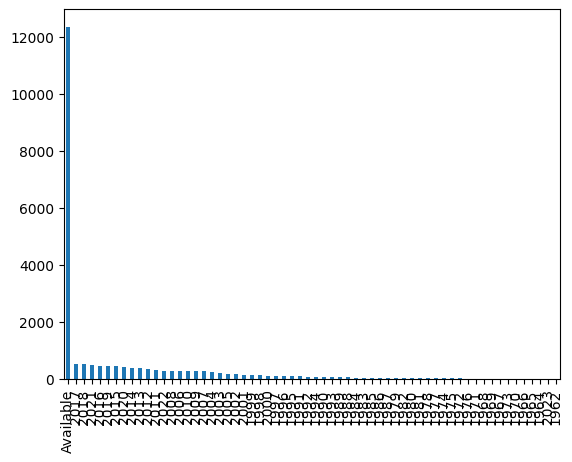

In [ ]:
df['End_Aired'].value_counts().plot(kind='bar')
plt.show()

Если прибегнуть к первому варианту, то придется кодировать значения года, что приведет к потере года как значению времени. Соответственно, лучше прибегнуть ко второму варианту, тем самым заменив значение на нынешний год.

In [ ]:
df['End_Aired'] = df['End_Aired'].str.replace(r'Available', '2023')

In [ ]:
df['Start_Aired'] = df['Start_Aired'].astype('str').astype('int')
df['End_Aired'] = df['End_Aired'].astype('str').astype('int')

В столбце 'Source' заменим пропущенные значения на самый часто встречающийся класс, а затем закодируем

In [ ]:
df['Source'].value_counts()

Original        7324
Manga           4408
Visual novel    1093
Game            1059
Light novel      898
Other            849
Novel            634
Music            357
Web manga        352
4-koma manga     306
Picture book     184
Book             156
Mixed media      111
Card game         65
Web novel         49
Radio             13
Name: Source, dtype: int64

In [ ]:
df.groupby(df['Source'].isnull()).mean()

<ipython-input-45-a82c37232919>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(df['Source'].isnull()).mean()


Episodes  Start_Aired    End_Aired  Duration_Minutes     Score  \
Source                                                                    
False   12.778714  2008.406596  2017.267163         23.008630  6.479721   
True    15.722933  1998.862299  2015.493892         28.522607  6.008433   

        Scored_Users         Ranked    Popularity       Members   Favorites  \
Source                                                                        
False   30048.802976   91950.985579  10056.254788  46856.067365  554.969481   
True     1269.113281  125063.748840  14148.363964   1635.712660    2.355913   

        ...  Rating_PG-13 - Teens 13 or older  \
Source  ...                                     
False   ...                          0.390133   
True    ...                          0.191005   

        Rating_R - 17+ (violence & profanity)  Rating_R+ - Mild Nudity  \
Source                                                                   
False                                0.069941                 0.050286   
True                                 0.024153                 0.037202   

        Rating_Rx - Hentai  Type_Movie  Type_Music  Type_ONA  Type_OVA  \
Source                                                                   
False             0.072909    0.164072    0.105723  0.142121  0.175440   
True              0.038590    0.269295    0.038867  0.073570  0.235702   

        Type_Special   Type_TV  
Source                          
False       0.109251  0.303393  
True        0.130761  0.251805  

[2 rows x 29 columns]

Как мы видим, крайне велика разница в количестве оценок от пользователей, в количестве добавлений в избранное и участников.

In [ ]:
df['Source_NaN'] = np.where(df['Source'].isnull(), 0,1)

In [ ]:
df.groupby(['Source_NaN', 'Scored_Users']) ['Score'].value_counts(normalize=True)

Source_NaN  Scored_Users  Score
0           103.0         5.791    1.00
            104.0         5.441    1.00
            106.0         5.071    0.25
                          5.441    0.25
                          5.641    0.25
                                   ... 
1           950704.0      8.411    1.00
            959062.0      8.341    1.00
            970920.0      8.261    1.00
            990254.0      7.201    1.00
            997243.0      7.881    1.00
Name: Score, Length: 14445, dtype: float64

In [ ]:
df.groupby(['Source_NaN', 'Members']) ['Score'].value_counts(normalize=True)

Source_NaN  Members  Score
0           203      5.441    1.0
            238      6.401    1.0
            269      5.471    1.0
            270      5.281    1.0
            274      5.251    1.0
                             ... 
1           2813565  7.201    1.0
            2879907  8.511    1.0
            2978455  9.131    1.0
            3504535  8.621    1.0
            3524109  8.531    1.0
Name: Score, Length: 14527, dtype: float64

In [ ]:
df.groupby(['Source_NaN', 'Favorites']) ['Score'].value_counts(normalize=True)

Source_NaN  Favorites  Score
0           0          5.771    0.016920
                       5.901    0.016920
                       5.501    0.013536
                       5.641    0.013536
                       5.681    0.013536
                                  ...   
1           159701     8.621    1.000000
            175248     9.081    1.000000
            177620     8.671    1.000000
            188649     9.041    1.000000
            207772     9.131    1.000000
Name: Score, Length: 9183, dtype: float64

Можем проследить, что добавление в избранное напрямую влияет на данные в столбце 'Source', соответственно, если добавлений в избранное практически нет (от 0 до 2), то и источник не будет указан. Данные пропуски заменим самым распространенным классом.

In [ ]:
df = df.drop('Source_NaN', axis=1)

In [ ]:
df['Source'].fillna(df['Source'].mode()[0], inplace=True)
df = pd.get_dummies(df, columns=['Source'], prefix=['Source'])

В 'Status' нет пропущенных значений, поэтому преобразуем значения сразу.

In [ ]:
df = pd.get_dummies(df, columns=['Status'], prefix=['Status'])

На первый взгляд в столбце 'Ranked' должны присутствовать уникальные значения, давайте взглянем на него.

In [ ]:
len(df['Ranked'])

21460

In [ ]:
df['Ranked'].nunique()

19051

In [ ]:
df['Ranked'].value_counts()

114112.0    3
109832.0    3
113692.0    3
109882.0    3
117492.0    2
           ..
63472.0     1
73652.0     1
36262.0     1
36112.0     1
193202.0    1
Name: Ranked, Length: 19051, dtype: int64

In [ ]:
df.groupby(df['Ranked'].isnull()).mean()

<ipython-input-56-76306d8a476f>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(df['Ranked'].isnull()).mean()


Episodes  Start_Aired    End_Aired  Duration_Minutes     Score  \
Ranked                                                                    
False   14.143750  2006.411292  2017.100635         23.801635  6.460079   
True     4.430336  2010.798337  2015.638254         25.279521  6.077797   

        Scored_Users        Ranked    Popularity       Members  Favorites  \
Ranked                                                                      
False   29113.737730  97795.212019  10995.746929  42179.567875  501.90904   
True     3133.735113           NaN   8177.803015   9681.626819   59.16632   

        ...  Source_Original  Source_Other  Source_Picture book  Source_Radio  \
Ranked  ...                                                                     
False   ...         0.539977      0.042230             0.009214      0.000665   
True    ...         0.195946      0.012474             0.002079      0.000000   

        Source_Visual novel  Source_Web manga  Source_Web novel  \
Ranked                                                            
False              0.019554          0.016175          0.001894   
True               0.369543          0.018711          0.006237   

        Status_Currently Airing  Status_Finished Airing  Status_Not yet aired  
Ranked                                                                         
False                  0.015305                0.984695               0.00000  
True                   0.013514                0.756757               0.22973  

[2 rows x 48 columns]

Как можем заменить, некоторые значения не уникальны, соответственно, заменим их. Предположительно, отсутствие у них значения в столбце 'Ranked' связано с их непопулярностью, так что заменим средним значением.

In [ ]:
df['Ranked'].fillna(df['Ranked'].mean(), inplace=True)

В столбце 'Genres' отсутствует 17% значений. Достаточно будет заменить их на самый распространенный класс, а затем закодируем значения.

In [ ]:
df.groupby(df['Genres'].isnull()).mean()

<ipython-input-58-72eb01dd4582>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(df['Genres'].isnull()).mean()


Episodes  Start_Aired    End_Aired  Duration_Minutes     Score  \
Genres                                                                    
False   13.564070  2007.132143  2016.117955         26.349222  6.479276   
True    11.874784  2005.231955  2021.058394         12.337931  5.917568   

        Scored_Users         Ranked    Popularity       Members   Favorites  \
Genres                                                                        
False   29307.574522   90529.588778   9633.700524  47040.701537  556.839705   
True     1975.513405  132681.596008  16069.978373   1935.006218    7.867261   

        ...  Source_Original  Source_Other  Source_Picture book  Source_Radio  \
Genres  ...                                                                     
False   ...         0.459152      0.036147             0.007882      0.000619   
True    ...         0.749121      0.055961             0.011895      0.000541   

        Source_Visual novel  Source_Web manga  Source_Web novel  \
Genres                                                            
False              0.060019          0.019143          0.002590   
True               0.007299          0.003244          0.000811   

        Status_Currently Airing  Status_Finished Airing  Status_Not yet aired  
Genres                                                                         
False                  0.016778                0.960363              0.022859  
True                   0.007299                0.982968              0.009732  

[2 rows x 48 columns]

Ситуация схожа со столбцом 'Source'. Если добавлений в избранное и участников крайне мало (по среднему значению), то и жанры тайтла не будут указаны. Так как этот столбец имеет важное значение (пользователи наверняка обращают внимание на жанр, при выборе тайтла и оценке), то избавляться от него нецелесобразно. Соответственно, заменим пропущенные значения на самый распространенный класс (их не так много, чтобы относить их в отдельный класс)

In [ ]:
df['Genres'].fillna(df['Genres'].mode()[0], inplace=True)

In [ ]:
df_extra = df['Genres'].str.get_dummies(', ').add_prefix('Genres_')
df = (df.drop(['Genres'],axis=1)).join(df_extra)

Перейдем к столбцам 'Producers', 'Studios' и 'Themes'. Здесь ситуация схожая со столбцом 'Demographics', пропущенных значений много (49%, 38% и 45% соответственно), но не все из этих столбцов имеют прямое отношение к выбору пользователей. По предварительному анализу можно сказать, что темы произведения важны, студии также должны играть роль (высок шанс, что оценка пользователя также может зависеть от его отношения к студии), а вот продюсеры играют уже менее важную роль. 

In [ ]:
df['Producers'].value_counts()

NHK                                                                      664
Pink Pineapple                                                           251
Sanrio                                                                   171
Aniplex                                                                  123
Bandai Visual                                                            119
                                                                        ... 
AT-X, Sony Music Communications                                            1
TV Tokyo, Bandai Visual, CyberConnect2                                     1
W-Toon Studio, Yomiuri TV Enterprise, DMM.futureworks, JY Animation        1
Nihon Ad Systems, Mainichi Broadcasting System, Pony Canyon, Kodansha      1
studio YOG                                                                 1
Name: Producers, Length: 4157, dtype: int64

Количество уникальных значений в столбце продюсеров велико, при применении метода get_dummies это может привести к чрезмерному увеличению размерности, что в дальнейшем может сказаться на ухудшении работы и обучении моделей, а также привести к менее точным прогнозам (все же количество пропущенных значений почти достигает половины от всех значений, а их влияние на выбор пользователей менее значительно). Выбросим этот столбец с целью ненадобности.

In [ ]:
df = df.drop('Producers', axis=1)

In [ ]:
df['Studios'].value_counts()

Toei Animation                    813
Sunrise                           524
J.C.Staff                         377
Madhouse                          328
Shanghai Animation Film Studio    324
                                 ... 
Sunrise, Bandai Spirits             1
Group TAC, Studio Junio             1
Arcturus                            1
Project No.9, Tri-Slash             1
Bigcat Studio                       1
Name: Studios, Length: 1423, dtype: int64

In [ ]:
df['Themes'].value_counts()

Music                                                  2204
School                                                  806
Historical                                              747
Mecha                                                   578
Parody                                                  309
                                                       ... 
Gag Humor, Historical, Parody, Samurai, Time Travel       1
Martial Arts, Parody, Workplace                           1
Historical, Isekai, Martial Arts                          1
Historical, School, Team Sports                           1
Harem, School, Time Travel                                1
Name: Themes, Length: 735, dtype: int64

In [ ]:
df['Studios'].fillna('Unknown', inplace=True)
df['Themes'].fillna('Unknown', inplace=True)

Кодирование студий с помощью one hoe encoding приведет к чрезмерному росту размерности датафрейма (добавится порядка 900+ новых столбцов), что слишком значительно повлияет на дальнейший анализ и работу, а также не является настолько целесобразным. Закодируем изменением категории.

In [ ]:
df['Studios'] = df['Studios'].astype('category').cat.codes

Поступим точно также со столбцом 'Themes'

In [ ]:
df_extra = df['Themes'].str.get_dummies(', ').add_prefix('Themes_')
df = (df.drop(['Themes'],axis=1)).join(df_extra)
df

Title  \
0                              Shingeki no Kyojin   
1                                      Death Note   
2                Fullmetal Alchemist: Brotherhood   
3                                   One Punch Man   
4                                Sword Art Online   
...                                           ...   
21455    Xiao Gongzhu Ai Wei La Yu Shenmi Wangguo   
21456  Xiao Gongzhu Ai Wei La Yu Shenmi Wangguo 2   
21457                     Yongzhe Chuang Mo Cheng   
21458             Yu Shen Chuan: Wangzhe Shaonian   
21459                               Konglong Wang   

                                                Synopsis  Episodes  \
0      Centuries ago, mankind was slaughtered to near...      25.0   
1      Brutal murders, petty thefts, and senseless vi...      37.0   
2      After a horrific alchemy experiment goes wrong...      64.0   
3      The seemingly unimpressive Saitama has a rathe...      12.0   
4      Ever since the release of the innovative Nerve...      25.0   
...                                                  ...       ...   
21455                                                NaN       1.0   
21456                                                NaN       1.0   
21457                                                NaN       1.0   
21458                                                NaN       1.0   
21459                                                NaN       1.0   

       Start_Aired  End_Aired  Studios  Duration_Minutes  Score  Scored_Users  \
0             2013       2013     1346              24.0  8.531      519803.0   
1             2006       2007      593              23.0  8.621      485487.0   
2             2009       2010      172              24.0  9.131      900398.0   
3             2015       2015      593              24.0  8.511       19066.0   
4             2012       2012        8              23.0  7.201      990254.0   
...            ...        ...      ...               ...    ...           ...   
21455         2018       2023     1317              78.0    NaN           NaN   
21456         2020       2023     1317              80.0    NaN           NaN   
21457         2018       2023     1317              80.0    NaN           NaN   
21458         2018       2023     1317              90.0    NaN           NaN   
21459         2018       2023     1317              95.0    NaN           NaN   

         Ranked  ...  Themes_Strategy Game  Themes_Super Power  \
0        1002.0  ...                     0                   0   
1         732.0  ...                     0                   0   
2          12.0  ...                     0                   0   
3        1112.0  ...                     0                   1   
4       29562.0  ...                     0                   0   
...         ...  ...                   ...                 ...   
21455  160892.0  ...                     0                   0   
21456  160902.0  ...                     0                   0   
21457  164032.0  ...                     0                   0   
21458  164462.0  ...                     0                   0   
21459  193202.0  ...                     0                   0   

       Themes_Survival  Themes_Team Sports  Themes_Time Travel  \
0                    1                   0                   0   
1                    0                   0                   0   
2                    0                   0                   0   
3                    0                   0                   0   
4                    0                   0                   0   
...                ...                 ...                 ...   
21455                0                   0                   0   
21456                0                   0                   0   
21457                0                   0                   0   
21458                0                   0                   0   
21459                0                   0                   0   

       

На данном этапе я откину столбцы "Title" и "Synopsis". Понимаю, что это может привести к ухудшению модели, поэтому учту это в итоговом выводе, но просто перекодировать в категориальные не вижу особо смысла. Вернусь к рассмотрению этих столбцов в будущем, когда закончу курс по анализу текста, дабы провести более надлежащий для них анализ.

In [ ]:
df = df.drop('Title', axis=1)
df = df.drop('Synopsis', axis=1)

Теперь рассмотрим столбцы таблицы на взаимосвязи и посмотрим, валидно ли применять методы сокращения размерности.

In [ ]:
df_tn = df[df['Score'].notnull()]

In [ ]:
df_twn = df[df['Score'].isnull()]

In [ ]:
scalar = StandardScaler()
scaled_data = pd.DataFrame(scalar.fit_transform(df_tn))
scaled_data

0         1         2         3         4         5          6    \
0      0.270541  0.435960 -0.254063  1.071597 -0.075873  2.316771   5.804396   
1      0.512208 -0.058105 -0.817935 -0.678090 -0.115794  2.415624   5.400615   
2      1.055958  0.153637 -0.535999 -1.656336 -0.075873  2.975794  10.282692   
3      0.008736  0.577122 -0.066105 -0.678090 -0.075873  2.294803  -0.087557   
4      0.270541  0.365380 -0.348041 -2.037410 -0.115794  0.855935  11.339988   
...         ...       ...       ...       ...       ...       ...        ...   
14557 -0.212792  0.647702  0.685725  1.004212 -0.874298 -0.209487  -0.310628   
14558 -0.212792  1.071187  0.685725 -1.577332 -0.914219  0.131009  -0.310604   
14559 -0.212792  0.788864  0.685725  1.004212 -0.874298 -0.538998  -0.310616   
14560 -0.212792  0.859445  0.685725  1.004212 -0.874298 -0.549982  -0.310686   
14561 -0.212792  1.071187  0.685725  1.004212 -0.834377 -0.176535  -0.310569   

            7         8          9    ...       111       112        113  \
0     -1.822828 -1.672703  18.507441  ... -0.131086 -0.190316  16.704444   
1     -1.830088 -1.672483  18.402948  ... -0.131086 -0.190316  -0.059864   
2     -1.849447 -1.672264  15.594548  ... -0.131086 -0.190316  -0.059864   
3     -1.819871 -1.672044  15.068464  ... -0.131086  5.254430  -0.059864   
4     -1.054918 -1.671825  14.714307  ... -0.131086 -0.190316  -0.059864   
...         ...       ...        ...  ...       ...       ...        ...   
14557  0.272255  2.222412  -0.304495  ... -0.131086 -0.190316  -0.059864   
14558 -0.195858  2.226144  -0.304500  ... -0.131086 -0.190316  -0.059864   
14559  0.671267  2.244143  -0.304527  ... -0.131086 -0.190316  -0.059864   
14560  0.687400  2.252485  -0.304538  ... -0.131086 -0.190316  -0.059864   
14561  0.221706  2.281240  -0.304575  ... -0.131086 -0.190316  -0.059864   

            114       115       116       117        118       119       120  
0     -0.121255 -0.086037 -0.817338 -0.099586  -0.088039 -0.068999 -0.088434  
1     -0.121255 -0.086037 -0.817338 -0.099586  -0.088039 -0.068999 -0.088434  
2     -0.121255 -0.086037 -0.817338 -0.099586  -0.088039 -0.068999 -0.088434  
3     -0.121255 -0.086037 -0.817338 -0.099586  -0.088039 -0.068999 -0.088434  
4     -0.121255 -0.086037 -0.817338 -0.099586  11.358603 -0.068999 -0.088434  
...         ...       ...       ...       ...        ...       ...       ...  
14557 -0.121255 -0.086037 -0.817338 -0.099586  -0.088039 -0.068999 -0.088434  
14558 -0.121255 -0.086037 -0.817338 -0.099586  -0.088039 -0.068999 -0.088434  
14559 -0.121255 -0.086037 -0.817338 -0.099586  -0.088039 -0.068999 -0.088434  
14560 -0.121255 -0.086037 -0.817338 -0.099586  -0.088039 -0.068999 -0.088434  
14561 -0.121255 -0.086037 -0.817338 -0.099586  -0.088039 -0.068999 -0.088434  

[14562 rows x 121 columns]

Посмотрим на корреляцию фич без РСА:

<Axes: >

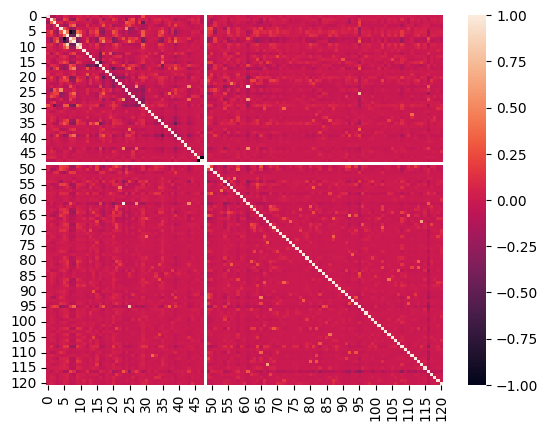

In [ ]:
sns.heatmap(scaled_data.corr())

Тепловая карта:

In [ ]:
plt.figure(figsize=(126, 126))
mask = np.triu(np.ones_like(df_tn.corr(), dtype=bool))
sns.heatmap(df_tn.corr(), mask = mask, annot=True, cmap='Spectral');

Применим РСА:

In [ ]:
pca = PCA(n_components = 40)
pca.fit(scaled_data)
data_pca = pca.transform(scaled_data)
data_pca = pd.DataFrame(data_pca)
data_pca.head()

0         1         2          3          4         5          6   \
0  15.892231 -0.141704  0.135918  16.143371  14.386002 -3.540083   6.638548   
1  14.861730  0.056705 -1.871103  14.535620  13.763439 -1.711705   6.777662   
2  17.059907 -0.573176 -0.843797  13.745612  12.707816 -0.321013  11.620422   
3   9.068587 -0.874394 -2.176711   6.397571   4.815098 -0.402641   3.277902   
4  12.112337 -0.114148 -3.535903   9.315413   5.421613  2.209265  10.658530   

         7          8         9   ...        30        31        32        33  \
0  1.757283   9.510429  0.872451  ...  2.511596  2.741149 -2.710614  0.469638   
1  3.107107   8.629102  0.585748  ... -5.044040  0.906102 -2.017088 -3.852681   
2  4.125692  10.580882 -1.896330  ... -3.473397  1.862702 -5.176037 -4.436600   
3  0.313608   3.414741  1.642108  ... -1.518382 -0.249000 -2.589738 -0.739774   
4  4.159803   3.814851 -2.353171  ... -0.066670  0.396363 -3.202999  5.136965   

         34        35        36        37        38        39  
0  3.707126  6.217166 -2.804063 -1.556766  3.864399  1.320160  
1  2.667198  0.604502 -4.335156  0.058105  2.421872  3.325158  
2  4.100073  3.123163 -5.310608 -0.783591  4.251029  3.632760  
3  0.532810  1.257577 -0.233847 -1.419210  0.964893  0.795064  
4 -0.747180  3.399881 -1.995443  0.548832  0.968073 -0.577658  

[5 rows x 40 columns]

Теперь посмотрим на корреляцию после применения РСА:

<Axes: >

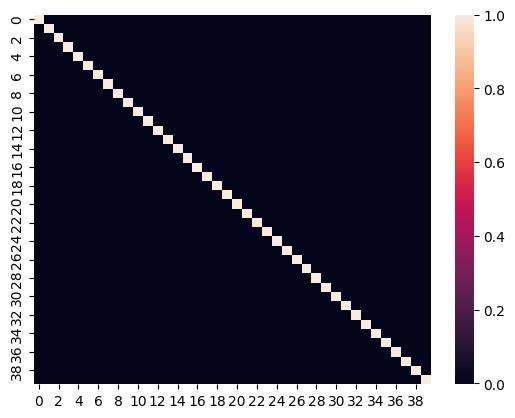

In [ ]:
sns.heatmap(data_pca.corr())

Сравним:

In [ ]:
df_tn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14562 entries, 0 to 17988
Columns: 121 entries, Episodes to Themes_Workplace
dtypes: float64(5), int16(1), int64(83), uint8(32)
memory usage: 10.4 MB


In [ ]:
data_pca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14562 entries, 0 to 14561
Data columns (total 40 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       14562 non-null  float64
 1   1       14562 non-null  float64
 2   2       14562 non-null  float64
 3   3       14562 non-null  float64
 4   4       14562 non-null  float64
 5   5       14562 non-null  float64
 6   6       14562 non-null  float64
 7   7       14562 non-null  float64
 8   8       14562 non-null  float64
 9   9       14562 non-null  float64
 10  10      14562 non-null  float64
 11  11      14562 non-null  float64
 12  12      14562 non-null  float64
 13  13      14562 non-null  float64
 14  14      14562 non-null  float64
 15  15      14562 non-null  float64
 16  16      14562 non-null  float64
 17  17      14562 non-null  float64
 18  18      14562 non-null  float64
 19  19      14562 non-null  float64
 20  20      14562 non-null  float64
 21  21      14562 non-null  float64
 22

Как можем увидеть, применив РСА мы получили втрое меньше столбцов, все данные были приведены к одному типу данных, а использование памяти уменьшилось чуть более, чем в два раза. Однако, нельзя не заметить, что при использовании РСА мы полностью потеряли интерпретируемость последующей модели. Соответственно, несмотря на улучшения, все же не стоит уменьшать размерность в данном случае (нам важны признаки и то, как они будут влиять друг на друга, а в черном ящике необходимости нет). Поэтому откажемся от уменьшения размерности.

Функция для быстрого использования one hot encoding, для удобства и оптимизации процесса.

In [ ]:
def encode_and_bind(original_dataframe, feature_to_encode):
    dummies = pd.get_dummies(original_dataframe[[feature_to_encode]])
    res = pd.concat([original_dataframe, dummies], axis=1)
    res = res.drop([feature_to_encode], axis=1)
    return(res)

**4. Исследовательский анализ данных**

Посмотрим, сколько тайтлов выходило каждый год

In [ ]:
df_pivot = df.loc[df['Scored_Users'].notna(), ['Start_Aired', 'Scored_Users']] \
                .groupby('Start_Aired') \
                .agg(['count', 'sum', 'mean', 'median'])

df_pivot.columns = df_pivot.columns.get_level_values(1)

Доля тайтлов, для которых есть информация об оценке пользователей: 0.68


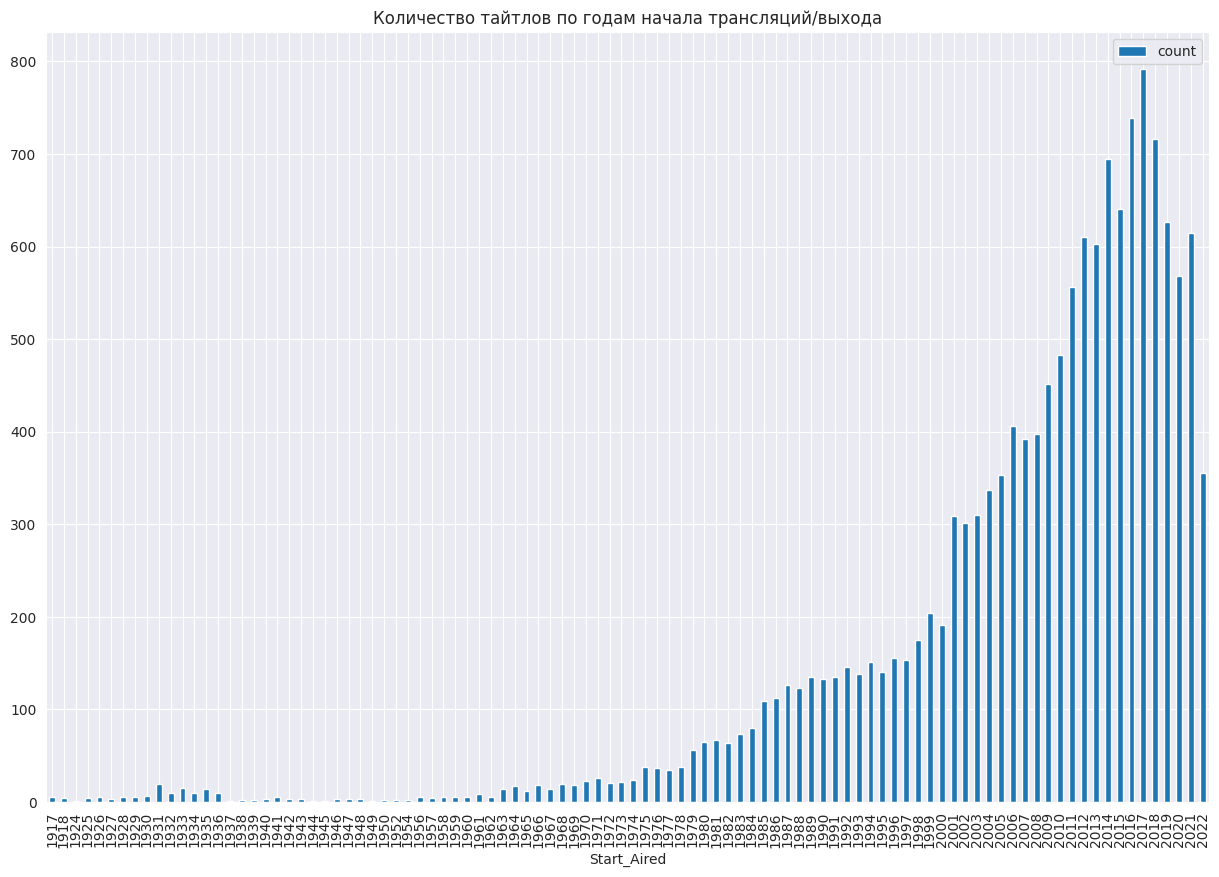

In [ ]:
df_pivot.plot(title='Количество тайтлов по годам начала трансляций/выхода', kind='bar', y='count', figsize=(15,10))
print(f'Доля тайтлов, для которых есть информация об оценке пользователей: {df.Score.notna().mean():.2f}')

Посмотрим на динамику оценок тайтлов по годам:

<Axes: title={'center': 'Динамика количества оценок тайтлов по годам'}, xlabel='Start_Aired'>

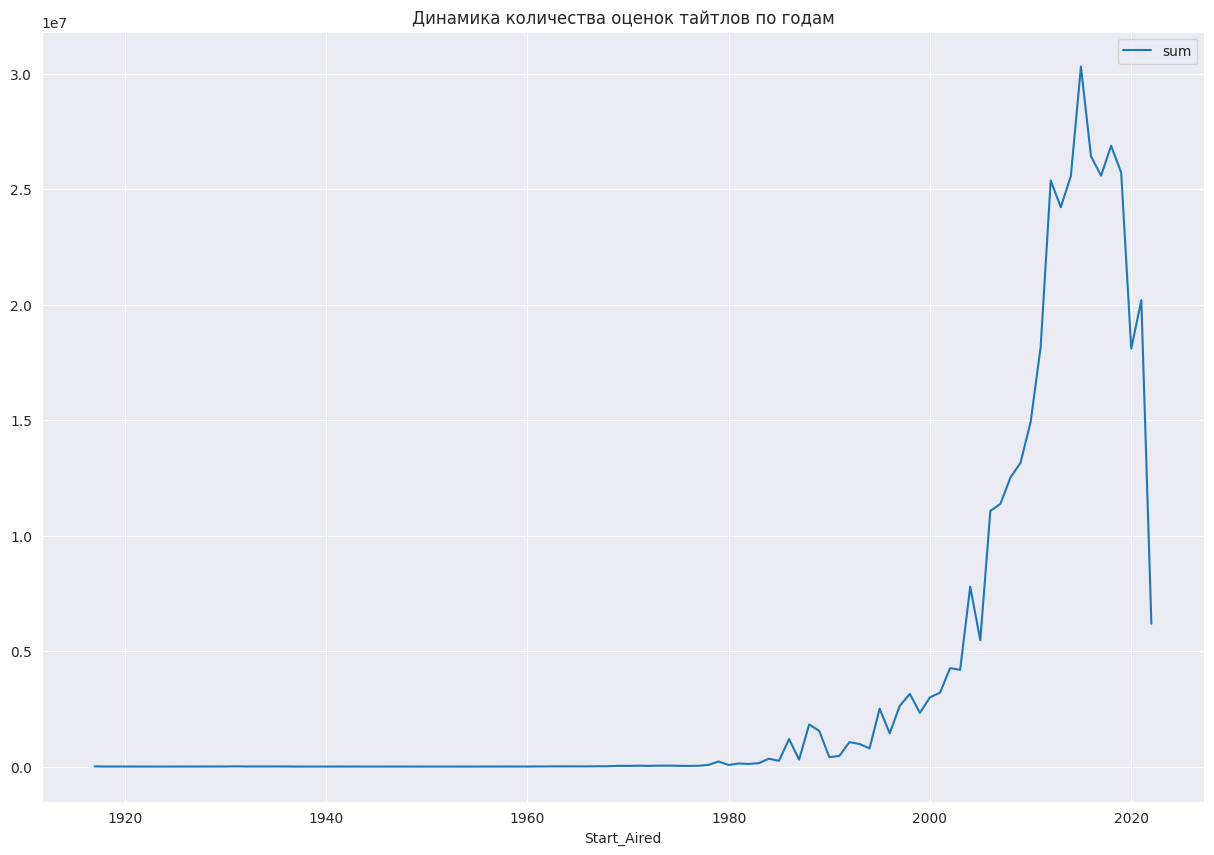

In [ ]:
df_pivot.plot(title='Динамика количества оценок тайтлов по годам', kind='line', y='sum', figsize=(15,10))

In [ ]:
print(f"В {df_pivot['sum'].idxmin()} было меньше всего оценок, в {df_pivot['sum'].idxmax()} больше всего.")

В 1949 было меньше всего оценок, в 2015 больше всего.


Примерно с 2000 года наблюдается рост в количестве оценок от пользователей, который мог быть связан с обще-мировым прогрессом. Посмотрим на среднее и медиану по годам:

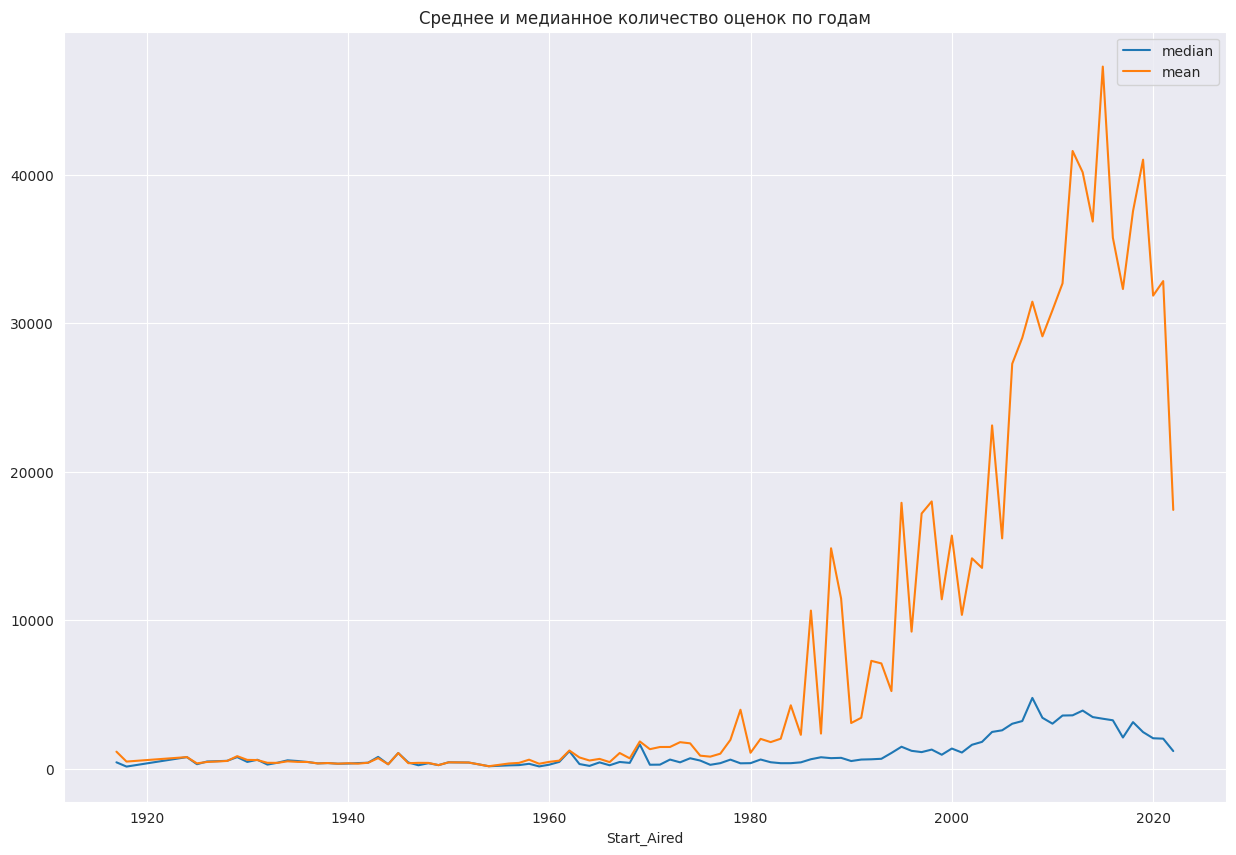

In [ ]:
df_pivot.plot(title='Среднее и медианное количество оценок по годам', kind='line', y=['median', 'mean'], figsize=(15,10))
print()

Для полноты картины посмотрим распределение оценок в зависимости от демографии, возрастного рейтинга и типа

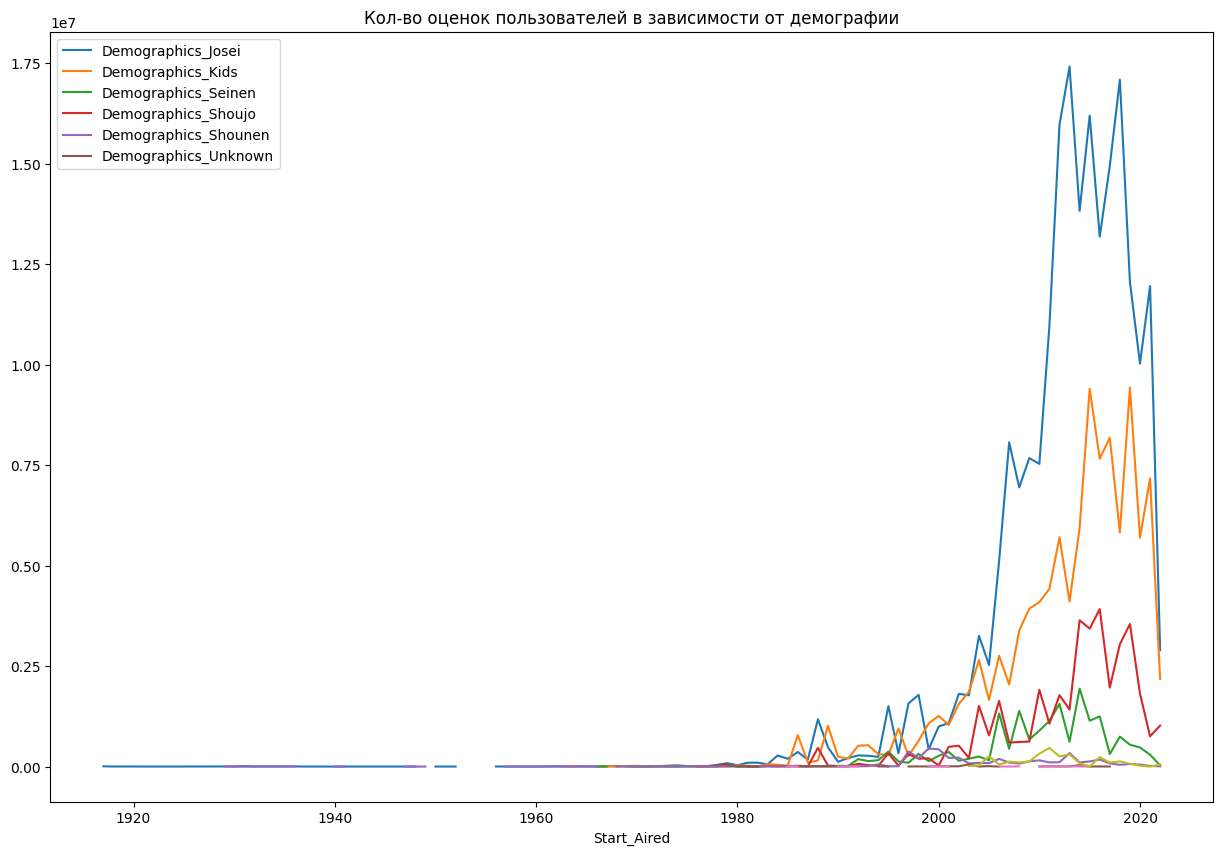

In [ ]:
df[df['Score'].notna()] \
    .pivot_table(index='Start_Aired',
                columns=['Demographics_Josei',
                          'Demographics_Kids',
                          'Demographics_Seinen',
                          'Demographics_Shoujo',
                          'Demographics_Shounen',
                          'Demographics_Unknown'],
                values='Scored_Users',
                aggfunc='sum') \
    .plot(title='Кол-во оценок пользователей в зависимости от демографии', kind='line', figsize=(15,10), legend={'reverse'})\
    .legend(['Demographics_Josei',
                          'Demographics_Kids',
                          'Demographics_Seinen',
                          'Demographics_Shoujo',
                          'Demographics_Shounen',
                          'Demographics_Unknown'])
print()

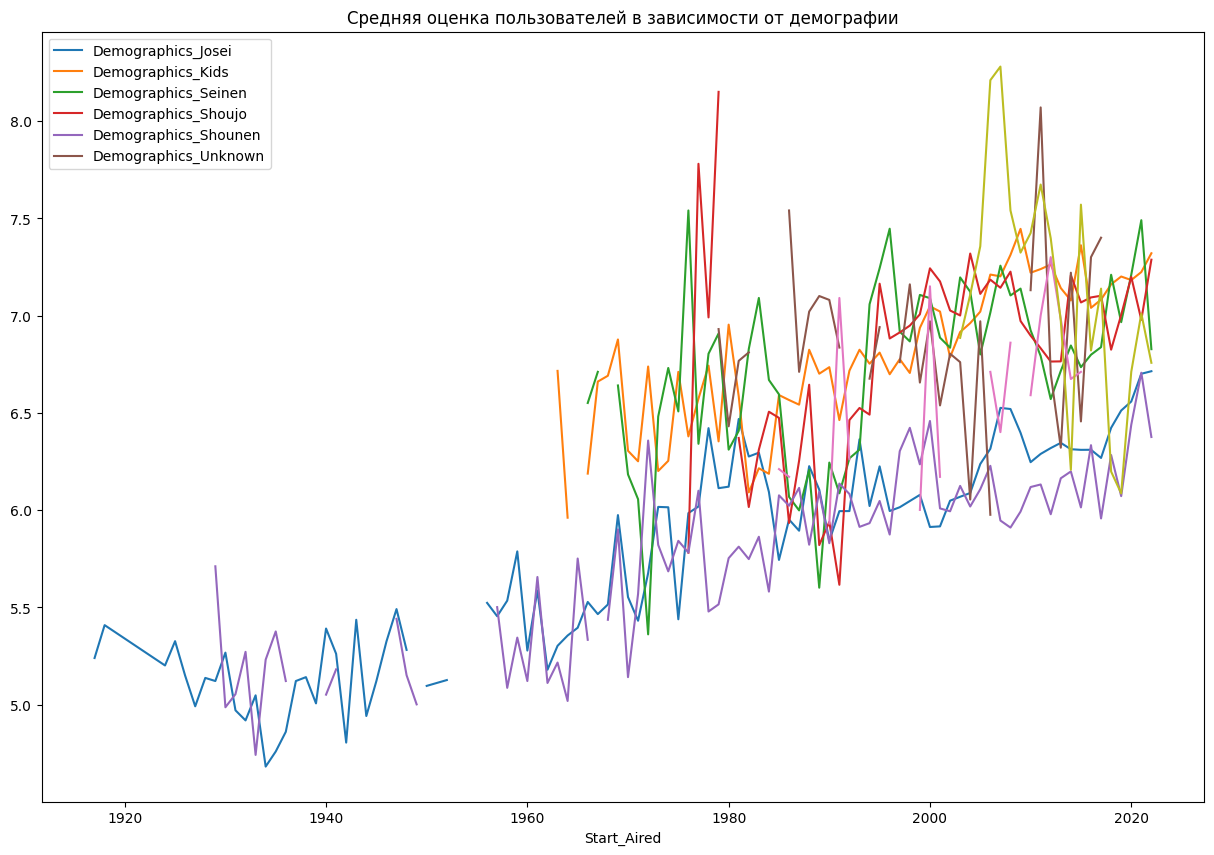

In [ ]:
df[df['Score'].notna()] \
    .pivot_table(index='Start_Aired',
                columns=['Demographics_Josei',
                          'Demographics_Kids',
                          'Demographics_Seinen',
                          'Demographics_Shoujo',
                          'Demographics_Shounen',
                          'Demographics_Unknown'],
                values='Score',
                aggfunc='mean') \
    .plot(title='Средняя оценка пользователей в зависимости от демографии', kind='line', figsize=(15,10), legend={'reverse'})\
    .legend(['Demographics_Josei',
                          'Demographics_Kids',
                          'Demographics_Seinen',
                          'Demographics_Shoujo',
                          'Demographics_Shounen',
                          'Demographics_Unknown'])
print()

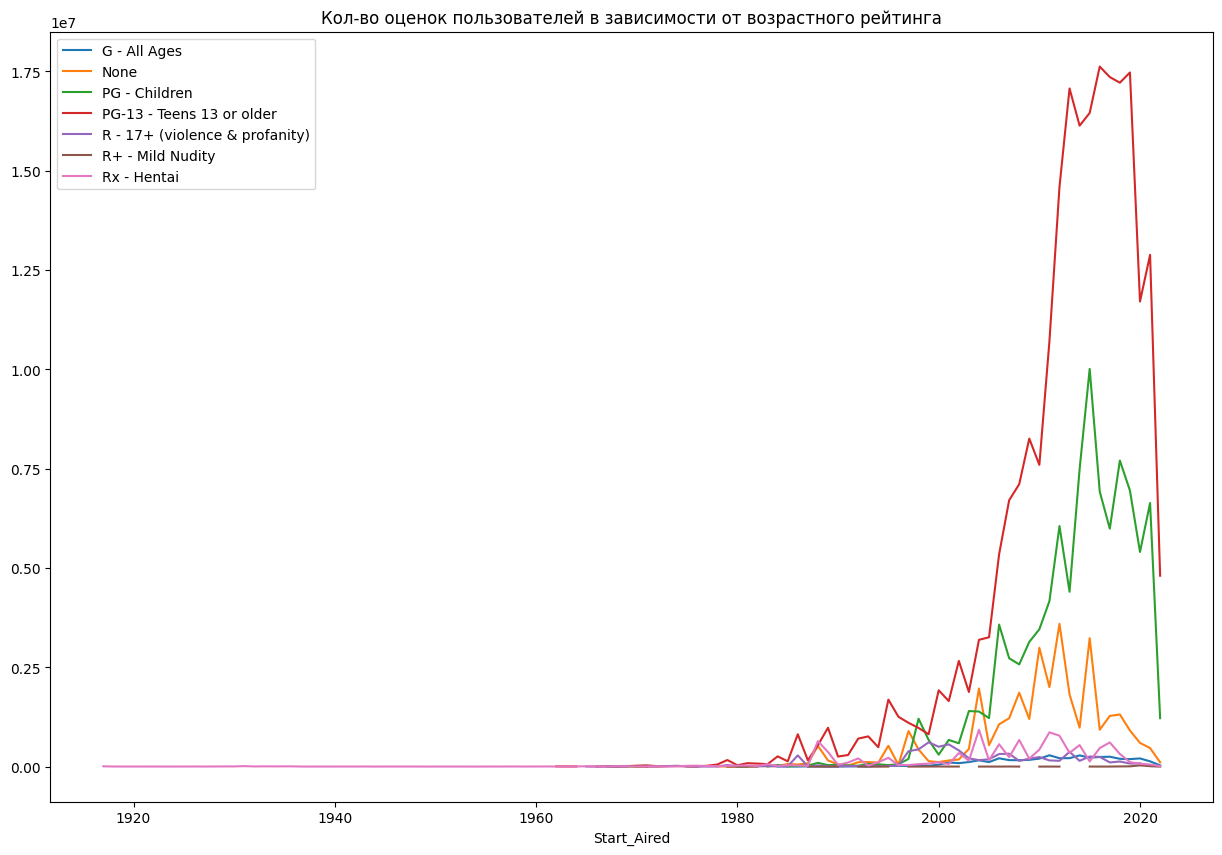

In [ ]:
df[df['Score'].notna()] \
    .pivot_table(index='Start_Aired',
                columns=['Rating_G - All Ages',
                          'Rating_None',
                          'Rating_PG - Children',
                          'Rating_PG-13 - Teens 13 or older',
                          'Rating_R - 17+ (violence & profanity)',
                          'Rating_R+ - Mild Nudity',
                          'Rating_Rx - Hentai'],
                values='Scored_Users',
                aggfunc='sum') \
    .plot(title='Кол-во оценок пользователей в зависимости от возрастного рейтинга', kind='line', figsize=(15,10)) \
    .legend(['G - All Ages',
              'None',
              'PG - Children',
              'PG-13 - Teens 13 or older',
              'R - 17+ (violence & profanity)',
              'R+ - Mild Nudity',
              'Rx - Hentai'])
print()

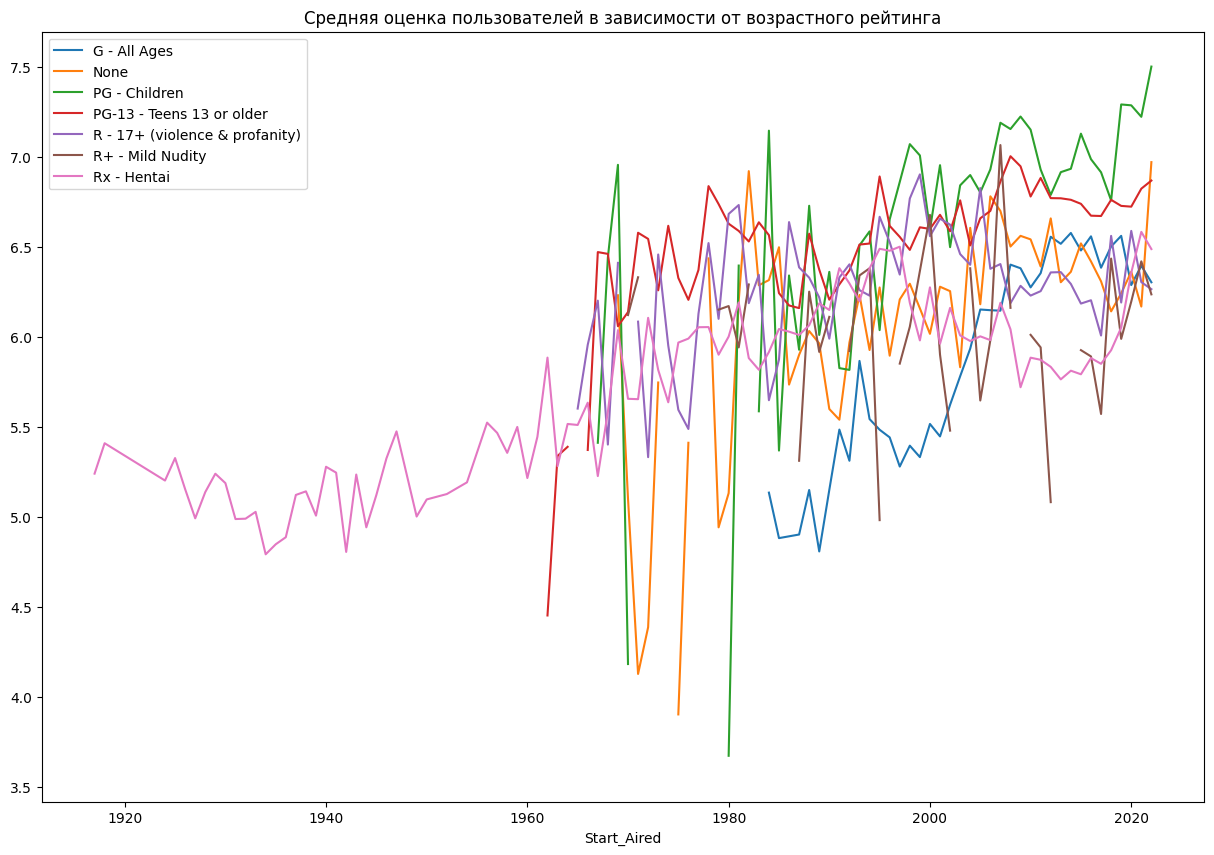

In [ ]:
df[df['Score'].notna()] \
    .pivot_table(index='Start_Aired',
                columns=['Rating_G - All Ages',
                          'Rating_None',
                          'Rating_PG - Children',
                          'Rating_PG-13 - Teens 13 or older',
                          'Rating_R - 17+ (violence & profanity)',
                          'Rating_R+ - Mild Nudity',
                          'Rating_Rx - Hentai'],
                values='Score',
                aggfunc='mean') \
    .plot(title='Средняя оценка пользователей в зависимости от возрастного рейтинга', kind='line', figsize=(15,10)) \
    .legend(['G - All Ages',
              'None',
              'PG - Children',
              'PG-13 - Teens 13 or older',
              'R - 17+ (violence & profanity)',
              'R+ - Mild Nudity',
              'Rx - Hentai'])
print()

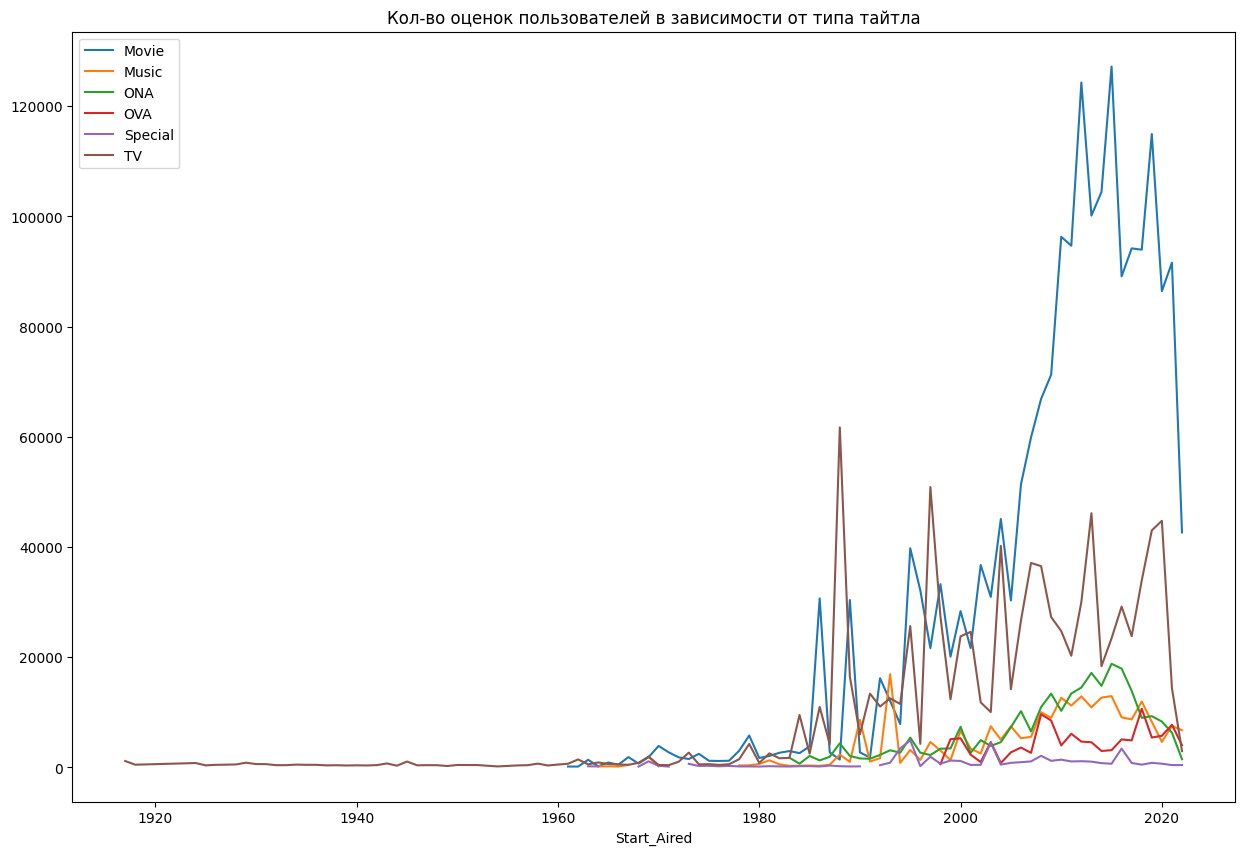

In [ ]:
df[df['Score'].notna()] \
    .pivot_table(index='Start_Aired',
                columns=['Type_Movie',
                          'Type_Music',
                          'Type_ONA',
                          'Type_OVA',
                          'Type_Special',
                          'Type_TV'],
                values='Scored_Users',
                aggfunc='mean') \
    .plot(title='Кол-во оценок пользователей в зависимости от типа тайтла', kind='line', figsize=(15,10), legend={'reverse'})\
    .legend(['Movie',
              'Music',
              'ONA',
              'OVA',
              'Special',
              'TV'])
print()

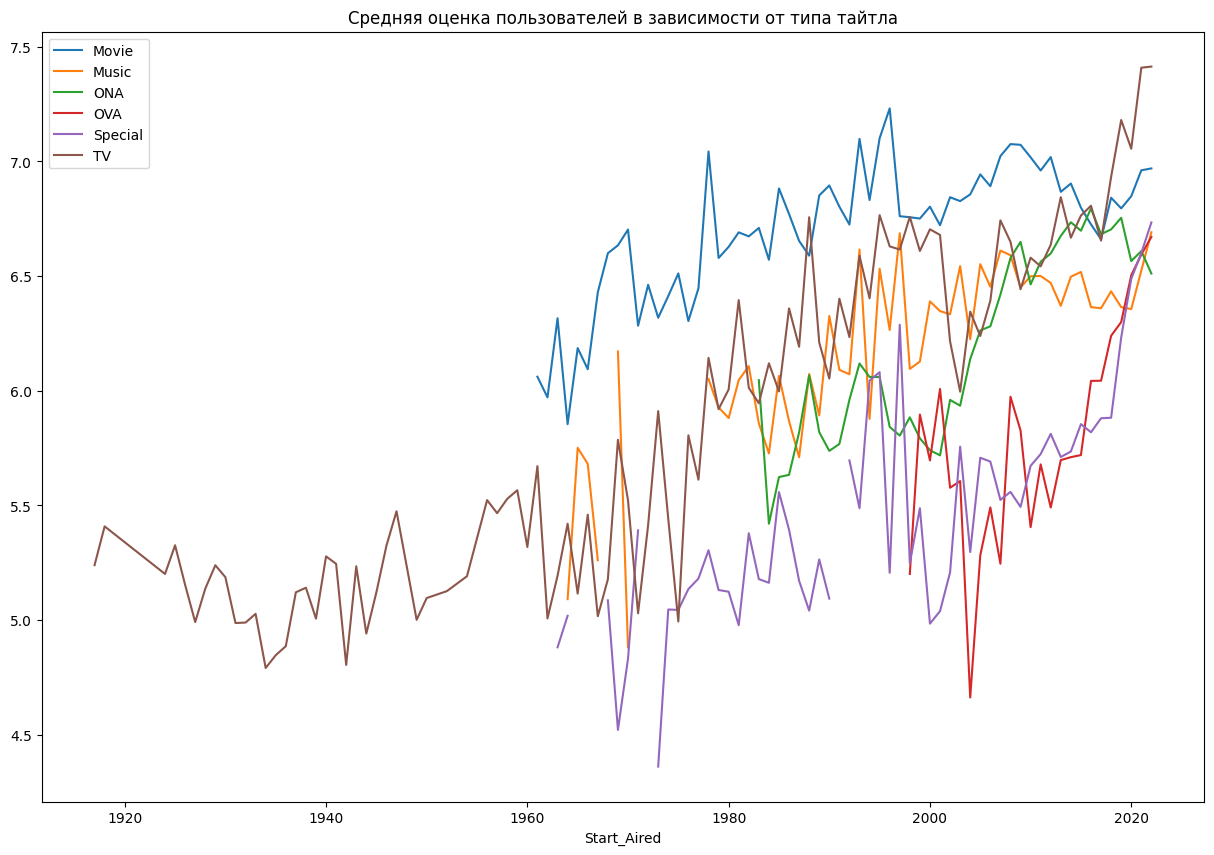

In [ ]:
df[df['Score'].notna()] \
    .pivot_table(index='Start_Aired',
                columns=['Type_Movie',
                          'Type_Music',
                          'Type_ONA',
                          'Type_OVA',
                          'Type_Special',
                          'Type_TV'],
                values='Score',
                aggfunc='mean') \
    .plot(title='Средняя оценка пользователей в зависимости от типа тайтла', kind='line', figsize=(15,10))\
    .legend(['Movie',
              'Music',
              'ONA',
              'OVA',
              'Special',
              'TV'])
print()

Теперь рассмотрим наши целевые переменные: Score и Scored_Users.
Анализ распределения оценки:

<Axes: xlabel='Score', ylabel='Count'>

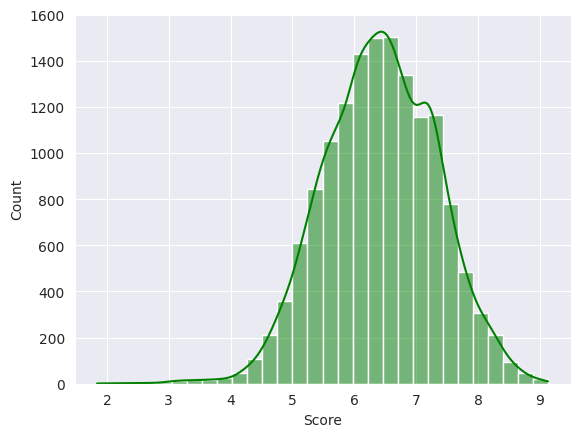

In [ ]:
sns.histplot(df['Score'], kde=True, color='green', bins=30)

Можно сказать, что распределение оценок похоже на нормальное распределение, с концентрацией основного количества оценок в зоне от 4 до 8

**5. Создание и обучение модели**

Основная проблема: так как первой целью является прогнозирование оценки, то и целевым столбцом является "Score", но как было показано выше - он имеет 6898 NaN значений. Соответственно, предпример следующие меры: обучим две модели. Для первой модели в качестве датасета выкинем из исходного все строки с пропусками в столбце "Score", а для второй - заменим пропуски на среднее или медиану. По итогу посмотрим, какая модель будет иметь лучший прогноз.

**Сначала рассмотрим датасет без NaN в "Score":**

In [ ]:
df_not = df[df['Score'].notnull()]

In [ ]:
df_not.head()

Episodes  Start_Aired  End_Aired  Studios  Duration_Minutes  Score  \
0      25.0         2013       2013     1346              24.0  8.531   
1      37.0         2006       2007      593              23.0  8.621   
2      64.0         2009       2010      172              24.0  9.131   
3      12.0         2015       2015      593              24.0  8.511   
4      25.0         2012       2012        8              23.0  7.201   

   Scored_Users   Ranked  Popularity  Members  ...  Themes_Strategy Game  \
0      519803.0   1002.0           1  3524109  ...                     0   
1      485487.0    732.0           2  3504535  ...                     0   
2      900398.0     12.0           3  2978455  ...                     0   
3       19066.0   1112.0           4  2879907  ...                     0   
4      990254.0  29562.0           5  2813565  ...                     0   

   Themes_Super Power  Themes_Survival  Themes_Team Sports  \
0                   0                1                   0   
1                   0                0                   0   
2                   0                0                   0   
3                   1                0                   0   
4                   0                0                   0   

   Themes_Time Travel  Themes_Unknown  Themes_Vampire  Themes_Video Game  \
0                   0               0               0                  0   
1                   0               0               0                  0   
2                   0               0               0                  0   
3                   0               0               0                  0   
4                   0               0               0                  1   

   Themes_Visual Arts  Themes_Workplace  
0                   0                 0  
1                   0                 0  
2                   0                 0  
3                   0                 0  
4                   0                 0  

[5 rows x 121 columns]

In [ ]:
df_not.describe()

Episodes   Start_Aired     End_Aired       Studios  \
count  14562.000000  14562.000000  14562.000000  14562.000000   
mean      11.566219   2006.823239   2015.703406    884.824681   
std       49.656901     14.168662     10.641068    430.377272   
min        1.000000   1917.000000   1962.000000      0.000000   
25%        1.000000   2002.000000   2011.000000    546.000000   
50%        2.000000   2011.000000   2022.000000    994.000000   
75%       12.000000   2017.000000   2023.000000   1317.000000   
max     3057.000000   2022.000000   2023.000000   1423.000000   

       Duration_Minutes         Score   Scored_Users         Ranked  \
count      14562.000000  14562.000000   14562.000000   14562.000000   
mean          25.900568      6.421724   26507.173809   68796.331325   
std           25.050177      0.910469   84989.501599   37193.113197   
min            1.000000      1.841000     101.000000      12.000000   
25%            7.000000      5.791000     418.000000   36434.500000   
50%           23.000000      6.431000    1876.500000   72867.000000   
75%           27.000000      7.081000   11406.500000   97795.212019   
max          168.000000      9.131000  997243.000000  131202.000000   

         Popularity       Members  ...  Themes_Strategy Game  \
count  14562.000000  1.456200e+04  ...          14562.000000   
mean    7621.341505  5.722612e+04  ...              0.016893   
std     4555.862784  1.873302e+05  ...              0.128876   
min        1.000000  1.720000e+02  ...              0.000000   
25%     3713.000000  1.256000e+03  ...              0.000000   
50%     7489.500000  5.137500e+03  ...              0.000000   
75%    11319.000000  2.777175e+04  ...              0.000000   
max    18014.000000  3.524109e+06  ...              1.000000   

       Themes_Super Power  Themes_Survival  Themes_Team Sports  \
count        14562.000000     14562.000000        14562.000000   
mean             0.034954         0.003571            0.014490   
std              0.183670         0.059653            0.119502   
min              0.000000         0.000000            0.000000   
25%              0.000000         0.000000            0.000000   
50%              0.000000         0.000000            0.000000   
75%              0.000000         0.000000            0.000000   
max              1.000000         1.000000            1.000000   

       Themes_Time Travel  Themes_Unknown  Themes_Vampire  Themes_Video Game  \
count        14562.000000    14562.000000    14562.000000       14562.000000   
mean             0.007348        0.400494        0.009820           0.007691   
std              0.085407        0.490015        0.098612           0.087365   
min              0.000000        0.000000        0.000000           0.000000   
25%              0.000000        0.000000        0.000000           0.000000   
50%              0.000000        0.000000        0.000000           0.000000   
75%              0.000000        1.000000        0.000000           0.000000   
max              1.000000        1.000000        1.000000           1.000000   

       Themes_Visual Arts  Themes_Workplace  
count        14562.000000      14562.000000  
mean             0.004738          0.007760  
std              0.068675          0.087751  
min              0.000000          0.000000  
25%              0.000000          0.000000  
50%              0.000000          0.000000  
75%              0.000000          0.000000  
max              1.000000          1.000000  

[8 rows x 121 columns]

In [ ]:
df_not.isnull().sum()

Episodes              0
Start_Aired           0
End_Aired             0
Studios               0
Duration_Minutes      0
                     ..
Themes_Unknown        0
Themes_Vampire        0
Themes_Video Game     0
Themes_Visual Arts    0
Themes_Workplace      0
Length: 121, dtype: int64

**Linear regression**

Для начала реализуем стандартную линейную регрессию (так сказать baseline). Разделим датасет на тренировочный и тестовый блоки:

In [ ]:
X = df_not.drop(['Score'], axis = 1)
y = df_not['Score']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

Обучим модель:

In [ ]:
model = LinearRegression() 
model.fit(X_train, y_train)

LinearRegression()

Модель линейной регрессии в основном находит наилучшее значение для точки пересечения и наклона, в результате чего получается линия, которая наилучшим образом соответствует данным. Чтобы увидеть значение точки пересечения и наклона, вычисленное алгоритмом линейной регрессии для нашего набора данных, выполним:

In [ ]:
print(model.intercept_)

4.030331786716907


Для получения наклона (коэффициента x):

In [ ]:
print(model.coef_)

[ 1.29808868e-04  3.92930641e-03 -1.84853740e-03 -5.95938219e-06
 -1.02895520e-06  2.13659565e-07 -2.23076194e-05 -8.19999304e-06
 -6.07363051e-08  7.90553435e-06 -1.10164989e-01  2.02684115e-02
 -6.77122881e-02 -3.10105711e-02 -5.63414598e-02 -3.33315575e-02
 -6.00034810e-02 -4.28563620e-02 -8.67954103e-02 -1.17307372e-01
 -1.43658913e-01 -1.50488478e-01  6.01110016e-01  2.65002022e-02
  1.93809523e-02 -3.44769315e-02  1.81366695e-02  4.01273196e-03
 -3.35536245e-02  5.29285999e-03 -1.06388587e-02 -4.17822236e-03
 -6.60393561e-02 -3.43375562e-02  2.11763747e-02 -5.07857055e-02
 -6.00918278e-02 -9.08787776e-03 -5.35470632e-02 -2.50047056e-02
 -5.23169852e-03  5.78041175e-02  7.55995370e-02 -1.52592263e-02
  1.74329209e-01  2.43255082e-02 -2.43255082e-02  3.26128013e-16
 -2.49843910e-02  5.12366842e-03 -2.17424576e-01  1.78702653e-01
 -8.41980590e-02 -1.91682079e-02  2.77646558e-02 -1.90731008e-02
  6.41922706e-01 -2.08913379e-04 -1.86703729e-02 -3.96630754e-02
 -4.68025878e-01 -1.07079

Теперь, когда мы обучили наш алгоритм, пришло время сделать некоторые прогнозы. Для этого мы воспользуемся нашими тестовыми данными и посмотрим, насколько точно наш алгоритм предсказывает оценку:

In [ ]:
y_pred = model.predict(X_test)

Сравним предикт с реальными данными:

In [ ]:
df_show = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) 
df_show

Actual  Predicted
11507   5.981   5.731272
7150    5.741   5.990845
8989    7.211   7.342294
11700   6.251   6.118264
14641   6.171   6.040517
...       ...        ...
5923    6.651   6.658745
5768    6.451   6.472437
6997    7.121   7.225207
1699    7.311   7.502137
13258   6.831   6.865052

[3641 rows x 2 columns]

Оценим производительность алгоритма. Используем для этого три метрики:
1.   Средняя абсолютная ошибка (MAE) – это среднее абсолютное значение ошибок. 
2.   Среднеквадратичная ошибка (MSE) – это среднее значение квадратов ошибок.
3. Среднеквадратичная ошибка (RMSE) – это квадратный корень из среднего квадрата ошибок.



In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred)) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.16116809476990718
Mean Squared Error: 0.07558641209480362
Root Mean Squared Error: 0.2749298312202654


В принципе можно сказать, что алгоритм проделал достаточно хорошую работу (если не слишком). Среднеквадратичная ошибка составляет всего 0.275, что является чуть меньшим, чем 5% от среднего значения Score.

**Ridge regression**

In [ ]:
reg=linear_model.Ridge(alpha=0.9)

In [ ]:
X = df_not.drop(['Score'], axis = 1)
y = df_not['Score']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
reg.fit(X_train, y_train)

Ridge(alpha=0.9)

In [ ]:
reg.score(X_train,y_train)

0.9107470297862795

In [ ]:
reg.score(X_test,y_test)

0.9101940667507122

In [ ]:
reg.intercept_

4.020531730224981

In [ ]:
reg.coef_

array([ 1.29995482e-04,  3.93630677e-03, -1.86104110e-03, -5.98008227e-06,
       -2.50296637e-06,  2.12837338e-07, -2.23027229e-05, -8.24461726e-06,
       -6.01231571e-08,  7.90156112e-06, -1.04745708e-01,  2.37580848e-02,
       -6.37672115e-02, -2.77676840e-02, -5.26551247e-02, -2.95896185e-02,
       -4.35794867e-02, -2.62890925e-02, -7.04027576e-02, -1.01144688e-01,
       -1.27353949e-01, -1.35028348e-01,  5.03798321e-01,  2.65902177e-02,
        1.93746082e-02, -3.43973228e-02,  1.82067802e-02,  4.04033544e-03,
       -3.38146187e-02,  6.39511345e-03, -9.27299760e-03, -2.80291823e-03,
       -6.47760594e-02, -3.28909740e-02,  2.25968424e-02, -4.87511706e-02,
       -5.86835768e-02, -7.92281156e-03, -5.25129613e-02, -2.38225032e-02,
       -3.84883586e-03,  4.81163935e-02,  7.70672081e-02, -1.42584764e-02,
        1.65367727e-01,  2.44027943e-02, -2.44027943e-02,  0.00000000e+00,
       -2.49447526e-02,  5.13860044e-03, -2.16692537e-01,  1.51424791e-01,
       -7.72358886e-02, -

In [ ]:
d=pd.DataFrame(reg.coef_,X.columns[:],columns=["Coeficient"])
d

Coeficient
Episodes              0.000130
Start_Aired           0.003936
End_Aired            -0.001861
Studios              -0.000006
Duration_Minutes     -0.000003
...                        ...
Themes_Unknown       -0.001482
Themes_Vampire       -0.007297
Themes_Video Game    -0.002417
Themes_Visual Arts    0.007914
Themes_Workplace     -0.032883

[120 rows x 1 columns]

In [ ]:
y_pred2=reg.predict(X_test)

In [ ]:
df_reg = pd.DataFrame({"Actual": y_test , "Predict" : y_pred2})
df_reg

Actual   Predict
11507   5.981  5.730395
7150    5.741  5.990126
8989    7.211  7.341826
11700   6.251  6.118175
14641   6.171  6.039787
...       ...       ...
5923    6.651  6.658905
5768    6.451  6.472392
6997    7.121  7.225065
1699    7.311  7.502240
13258   6.831  6.864554

[3641 rows x 2 columns]

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred2)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred2)) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred2)))

Mean Absolute Error: 0.1611304347994255
Mean Squared Error: 0.07547166231440694
Root Mean Squared Error: 0.27472106274256974


По сравнению с обычной регрессией можно заметить, что улучшение результата идет лишь на 1000-ых долях, соответственно, она не так велика.

**KNN**

In [ ]:
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)
predictions_knn = knn.predict(X_test)

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions_knn)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions_knn)) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions_knn)))

Mean Absolute Error: 0.07052018676187864
Mean Squared Error: 0.03515633507278221
Root Mean Squared Error: 0.18750022686061532


**XGBRegressor**

In [ ]:
xgboost = XGBRegressor()
xgboost.fit(X_train, y_train)
predictions_xgb = xgboost.predict(X_test)

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions_xgb)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions_xgb)) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions_xgb)))

Mean Absolute Error: 0.03704407633493575
Mean Squared Error: 0.013149082902632125
Root Mean Squared Error: 0.11466945060752722


**GBRegressor**

In [ ]:
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)
predictions_gbr = gbr.predict(X_test)

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions_gbr)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions_gbr)) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions_gbr)))

Mean Absolute Error: 0.04795750683909686
Mean Squared Error: 0.016201052069585414
Root Mean Squared Error: 0.1272833534661364


**LGBMRegressor**

In [ ]:
lgb = LGBMRegressor()
lgb.fit(X_train, y_train)
predictions_lgb = lgb.predict(X_test)

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions_lgb)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions_lgb)) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions_lgb)))

Mean Absolute Error: 0.03674808232363239
Mean Squared Error: 0.01318844070461309
Root Mean Squared Error: 0.11484093653664224


**RandomForestRegressor**

In [ ]:
rf = RandomForestRegressor(n_estimators= 100)
rf.fit(X_train, y_train)
predictions_rf = rf.predict(X_test)

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions_rf)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions_rf)) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions_rf)))

Mean Absolute Error: 0.02706289480912208
Mean Squared Error: 0.01212563730843174
Root Mean Squared Error: 0.11011647155821758


**CatBoostRegressor**

In [ ]:
catboost = CatBoostRegressor(verbose= 0)
catboost.fit(X_train, y_train)
predictions_cb = catboost.predict(X_test)

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions_cb)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions_cb)) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions_cb)))

Mean Absolute Error: 0.03969978316100728
Mean Squared Error: 0.01269501973625384
Root Mean Squared Error: 0.11267217818190008


После обучения всех моделей, давайте посмотрим на важность фич:

In [ ]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
fig = go.Figure(go.Bar(
            x=rf.feature_importances_,
            y=X_train.columns,
            orientation='h', marker_color='steelblue'))
fig.update_layout(template='plotly_dark', title='<b>Estimating feature importance through the Random Forest model', title_x=0.5, 
                 xaxis_title="Feature importance", yaxis_title='Feature')

fig.show()

Как можем заменить, есть очевидный перевес у "Scored_Users", остальные же фичи лишь догоняют ее. В дальнейшем можно будет попробовать обучить модели без этой фичи, но это на будущее.

А теперь давайте посмотрим на все наши предикты: лучшие четыре варианта дают Catboost, XGB, LGBM и RandomForest, в отличие от LinearRegression, GradientBoosting, KNN и RidgeRegression. Соответственно, можем воспользоваться двумя подходами. Объединить четыре метода, либо оптимизировать параметры для одного из них. Воспользуемся первым подходом.

Возьмем четыре лучших модели (по результатам) и скомбинируем их:

In [ ]:
final_predictions = (
    0.25 * predictions_cb+
    0.25 * predictions_rf+
    0.25 * predictions_xgb+
    0.25 * predictions_lgb
)

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, final_predictions)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, final_predictions)) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, final_predictions)))

Mean Absolute Error: 0.03140617679182262
Mean Squared Error: 0.01175332410878323
Root Mean Squared Error: 0.10841274882956907


Улучшили результат до 0.108, в отличие от лучшего результата у RandomForest в 0.110

In [ ]:
final_predictions

array([5.9769624 , 6.16133663, 7.20944506, ..., 7.11214782, 7.31002229,
       6.83314061])

Посмотрим на сравнение наших предиктов с реальными данными:

In [ ]:
pd.DataFrame({'Actual': y_test, 'Predicted': final_predictions.round(3)})

Actual  Predicted
11507   5.981      5.977
7150    5.741      6.161
8989    7.211      7.209
11700   6.251      6.257
14641   6.171      6.170
...       ...        ...
5923    6.651      6.653
5768    6.451      6.448
6997    7.121      7.112
1699    7.311      7.310
13258   6.831      6.833

[3641 rows x 2 columns]

Посмотрим на визуализацию итоговых результатов:

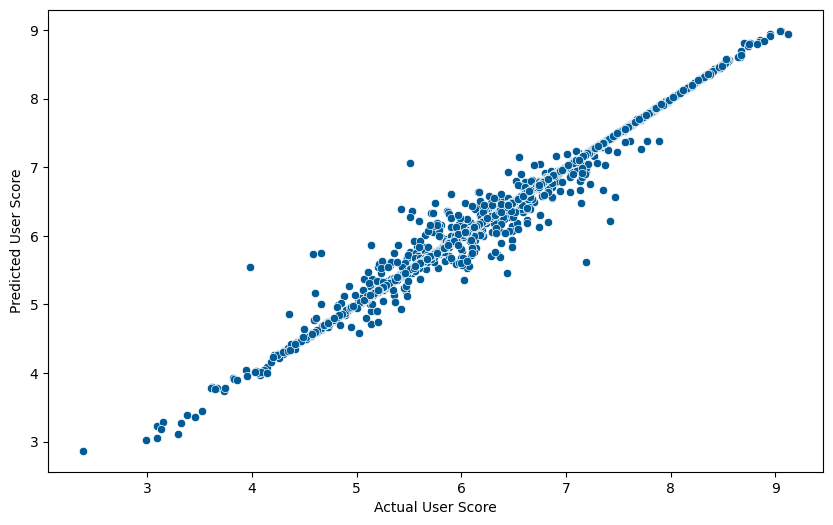

In [ ]:
plt.figure(figsize= (10, 6))
sns.scatterplot(x= y_test, y= final_predictions, color= '#005b96')
plt.xlabel('Actual User Score')
plt.ylabel('Predicted User Score')
plt.show()

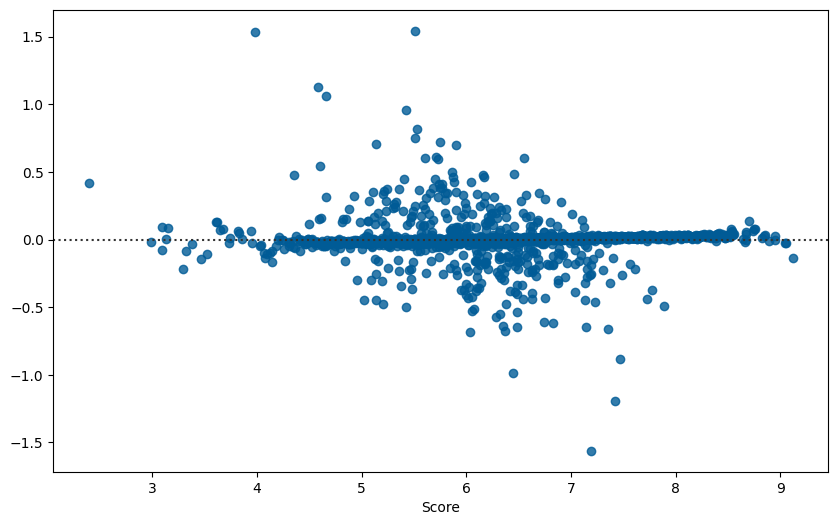

In [ ]:
plt.figure(figsize= (10, 6))
sns.residplot(x= y_test, y = final_predictions, color= '#005b96')
plt.show()

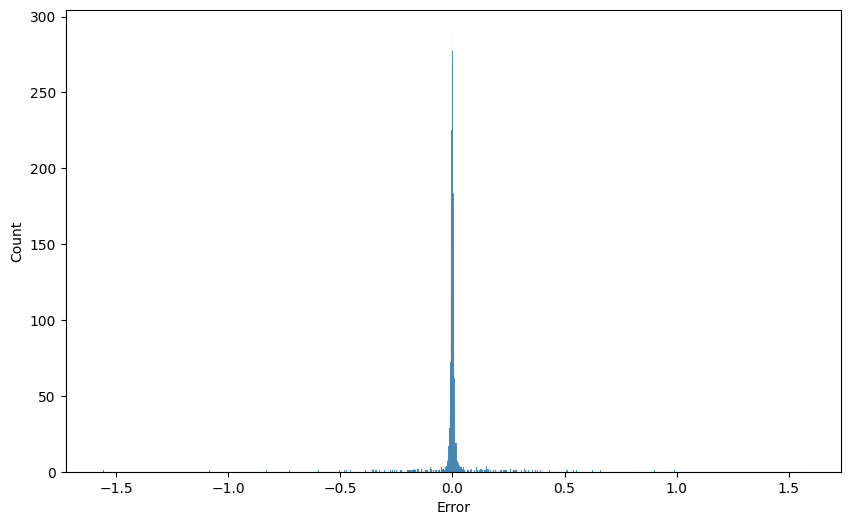

In [ ]:
resid = y_test - final_predictions
plt.figure(figsize= (10, 6))
sns.histplot(resid)
plt.xlabel('Error');

Распределение ошибок выглядит как нормальное распределение, соответственно, наш ансамбль моделей делает хорошую работу.

**Теперь рассмотрим датасет, содержащий NaN в "Score":**

Как было оговорено выше - заменим пропуски на среднее значение.

In [ ]:
df_with = df

In [ ]:
df_with['Score'].fillna(df_with['Score'].mean(), inplace=True)
df_with['Scored_Users'].fillna(df_with['Scored_Users'].mean(), inplace=True)

In [ ]:
df_with.isnull().sum()

Episodes              0
Start_Aired           0
End_Aired             0
Studios               0
Duration_Minutes      0
                     ..
Themes_Unknown        0
Themes_Vampire        0
Themes_Video Game     0
Themes_Visual Arts    0
Themes_Workplace      0
Length: 121, dtype: int64

Оптимизируем дальнейший процесс обучения. Нас интересует лишь RSME.

In [ ]:
X = df_with.drop(['Score'], axis = 1)
y = df_with['Score']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

Создадим словарь моделей:

In [ ]:
models = {
    'CatBoost':CatBoostRegressor(),
    'XGBRegressor':XGBRegressor(),
    'Ridge':linear_model.Ridge(alpha=0.9),
    'LinearRegression':LinearRegression(),
    'RandomForestRegressor':RandomForestRegressor(),
    'LGBMRegressor':LGBMRegressor(),
    'GBRegressor':GradientBoostingRegressor(),
    'KNeighborsRegressor':KNeighborsRegressor()
}

In [ ]:
model_results = []
model_names = []

# обучение модели через функции
for name,model in models.items():
    a = model.fit(X_train,y_train)
    predicted = a.predict(X_test)
    score = np.sqrt(mean_squared_error(y_test, predicted))
    model_results.append(score)
    model_names.append(name)
    
    # создаем датафрейм
    df_results = pd.DataFrame([model_names,model_results])
    df_results = df_results.transpose()
    df_results = df_results.rename(columns={0:'Model',1:'RMSE'}).sort_values(by='RMSE',ascending=False)
    
print(df_results)

Learning rate set to 0.063509
0:	learn: 0.7102242	total: 9.27ms	remaining: 9.26s
1:	learn: 0.6715843	total: 16.5ms	remaining: 8.23s
2:	learn: 0.6360415	total: 23.6ms	remaining: 7.84s
3:	learn: 0.6035092	total: 30.8ms	remaining: 7.67s
4:	learn: 0.5724526	total: 38ms	remaining: 7.55s
5:	learn: 0.5430519	total: 44.5ms	remaining: 7.37s
6:	learn: 0.5156566	total: 51.1ms	remaining: 7.25s
7:	learn: 0.4914085	total: 57.8ms	remaining: 7.17s
8:	learn: 0.4684974	total: 64.8ms	remaining: 7.14s
9:	learn: 0.4461210	total: 72.9ms	remaining: 7.21s
10:	learn: 0.4251943	total: 79.4ms	remaining: 7.14s
11:	learn: 0.4053250	total: 86ms	remaining: 7.08s
12:	learn: 0.3871282	total: 92.8ms	remaining: 7.05s
13:	learn: 0.3701362	total: 99.8ms	remaining: 7.03s
14:	learn: 0.3536866	total: 107ms	remaining: 7.01s
15:	learn: 0.3390270	total: 114ms	remaining: 6.99s
16:	learn: 0.3253990	total: 121ms	remaining: 6.98s
17:	learn: 0.3133051	total: 128ms	remaining: 6.97s
18:	learn: 0.3007355	total: 135ms	remaining: 6.96s
1

Результаты выглядят интересно. Если LinearRegression, Ridge, KNN и GBRegressor показали ошибку выше, чем на датасете с выкинутыми пропусками (как и предполагалось изначально), то XGB, LGBM, CatBoost и RF наоборот, получили еще более меньший результат ошибки, что немного рушит первоначальное предположение. Поступим дальше также, как и в первом случае - объединим модели:

In [ ]:
xgboost = XGBRegressor()
xgboost.fit(X_train, y_train)
predictions_xgb = xgboost.predict(X_test)

In [ ]:
lgb = LGBMRegressor()
lgb.fit(X_train, y_train)
predictions_lgb = lgb.predict(X_test)

In [ ]:
catboost = CatBoostRegressor(verbose= 0)
catboost.fit(X_train, y_train)
predictions_cb = catboost.predict(X_test)

In [ ]:
rf = RandomForestRegressor(n_estimators= 100)
rf.fit(X_train, y_train)
predictions_rf = rf.predict(X_test)

In [ ]:
final_predictions2 = (
    0.25 * predictions_cb+
    0.25 * predictions_rf+
    0.25 * predictions_xgb+
    0.25 * predictions_lgb
)

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, final_predictions2)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, final_predictions2)) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, final_predictions2)))

Mean Absolute Error: 0.022439040619520335
Mean Squared Error: 0.008440659348554508
Root Mean Squared Error: 0.09187306106010895


Результат RSME действительно улучшился по сравнению с датасетом, где отсутствовали пропуски.

In [ ]:
pd.DataFrame({'Actual': y_test, 'Predicted': final_predictions2.round(6)})

Actual  Predicted
9933   6.421724   6.420510
6698   6.731000   6.385076
11156  6.041000   6.054760
19333  6.421724   6.422291
12314  6.051000   6.052414
...         ...        ...
18859  6.421724   6.421138
11744  6.051000   6.055679
2917   6.541000   6.533747
15028  6.421724   6.423867
1124   6.891000   6.891884

[5365 rows x 2 columns]

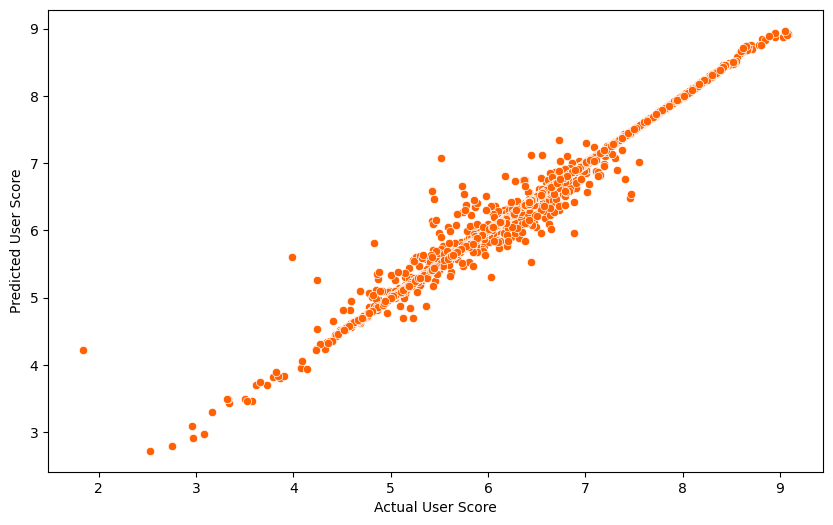

In [ ]:
plt.figure(figsize= (10, 6))
sns.scatterplot(x= y_test, y= final_predictions2, color= '#ff6103')
plt.xlabel('Actual User Score')
plt.ylabel('Predicted User Score')
plt.show()

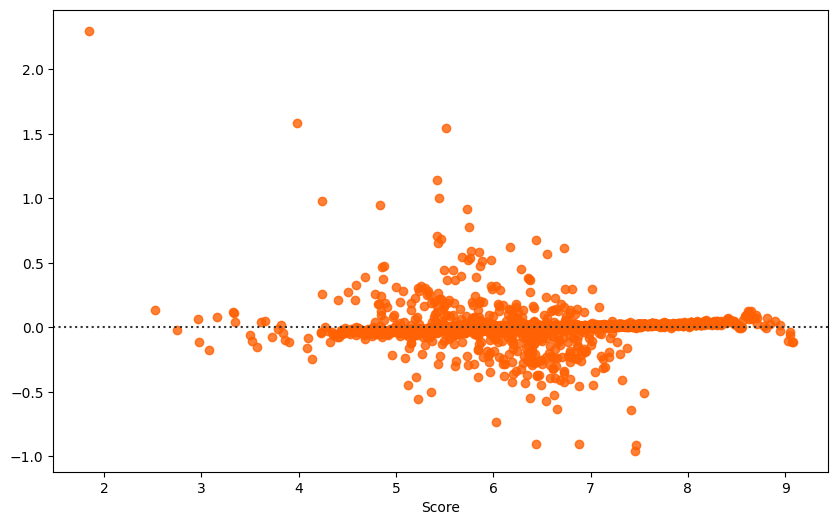

In [ ]:
plt.figure(figsize= (10, 6))
sns.residplot(x= y_test, y = final_predictions2, color= '#ff6103')
plt.show()

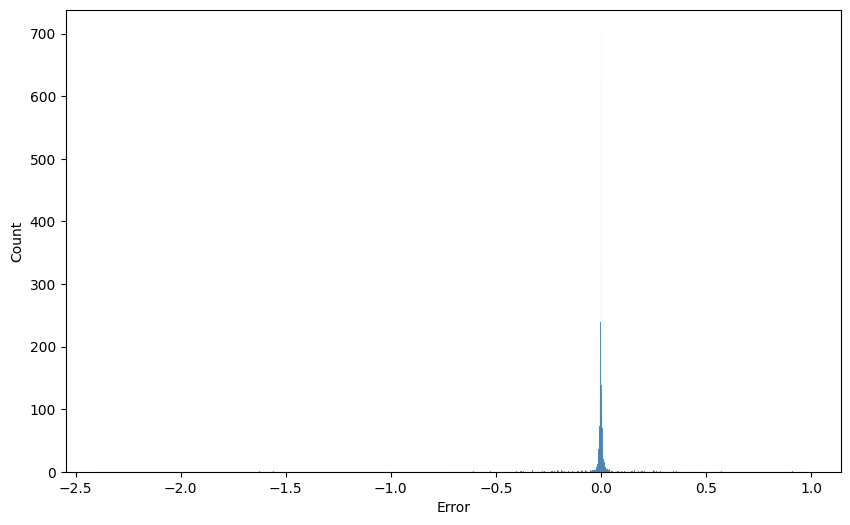

In [ ]:
resid = y_test - final_predictions2
plt.figure(figsize= (10, 6))
sns.histplot(resid)
plt.xlabel('Error');

Значения ошибки все еще подлежат нормальному распределению, что говорит о хорошей работе модели.

**Итог**

Как показали результаты, модели обученные на датасете с пропусками в целевом столбце, замененные на среднее значение - показали меньшее значение RMSE в отличие от моделей, которые обучались на датасете, из которого были выкинуты пропуски. 

**На будущее**

Разделить тайтлы по некоторому признаку, например по популярности, и обучить модель прогнозировать принадлежность к тому или иному классу.